In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc
import scvi

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 600, vector_friendly = True, format = 'pdf')

In [2]:
cd D:\chai_WJH\Neomycin_Project\R\new_p21

D:\chai_WJH\Neomycin_Project\R\new_p21


In [3]:
adata_p21 = sc.read("P21_ITG_raw_scanvi_SCANPY.h5ad")

In [4]:
sc.pp.log1p(adata_p21)

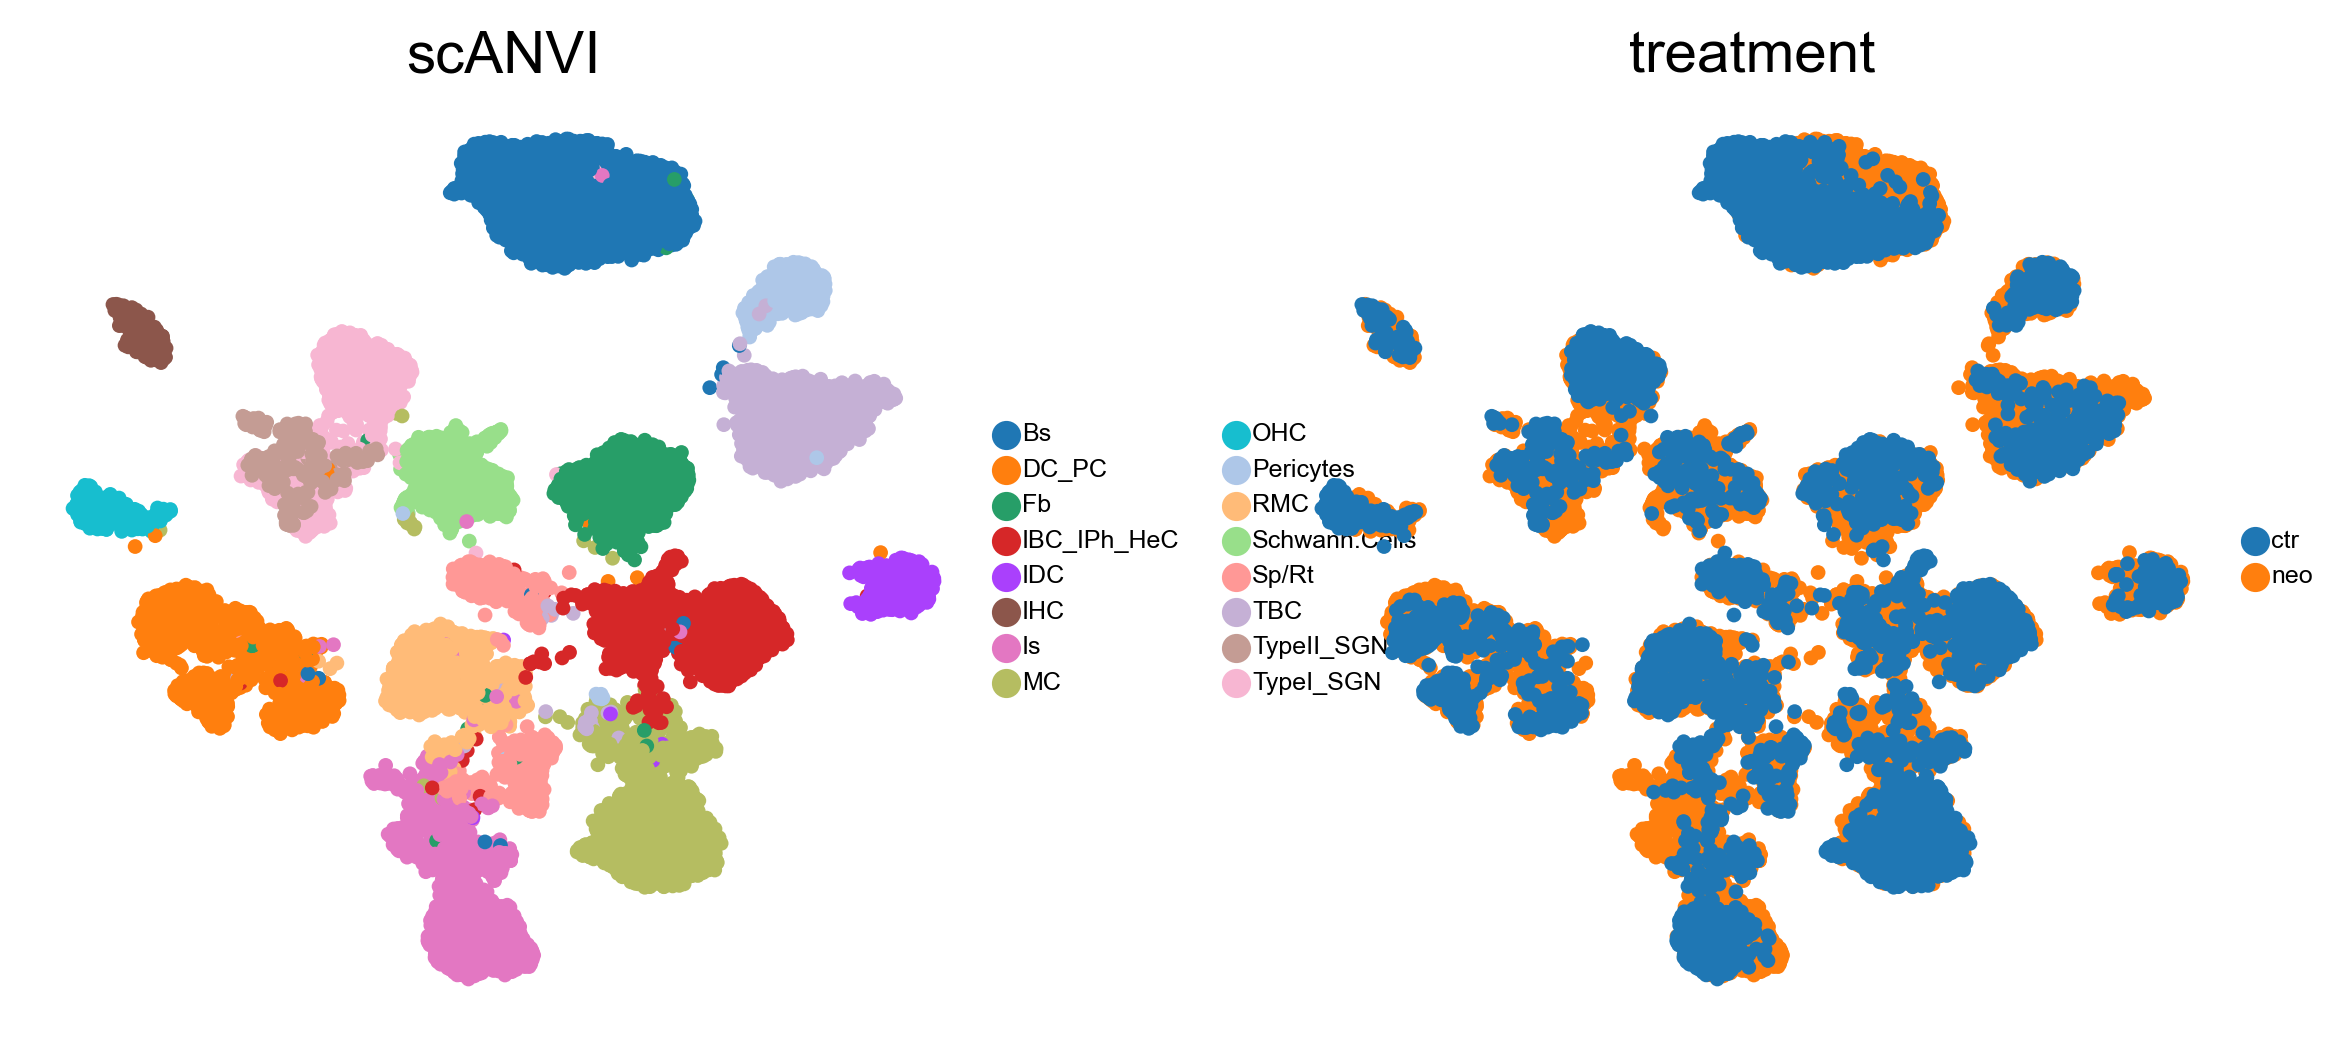

In [5]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata_p21, color=['cell_type2','treatment'], wspace=0.2,
           size=50,
           legend_fontsize=6,ncols =2,title='scANVI',
           #save='_.pdf'
          )

In [6]:
sc.tl.rank_genes_groups(adata_p21, 'treatment',method='t-test',corr_method='benjamini-hochberg')

In [7]:
adata_p21

AnnData object with n_obs × n_vars = 26265 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
pd.DataFrame(adata_p21.uns['rank_genes_groups']['names'])

ctr            neo
0              Cmss1           Xist
1               Cdk8           Tsix
2            Gm42418        Gm47283
3               Gphn  5330438D12Rik
4              Lars2        Gm48678
...              ...            ...
32280        Gm48678          Lars2
32281  5330438D12Rik           Gphn
32282        Gm47283        Gm42418
32283           Tsix           Cdk8
32284           Xist          Cmss1

[32285 rows x 2 columns]

In [9]:
adata=adata_p21.copy()
adata

AnnData object with n_obs × n_vars = 26265 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [10]:
import collections

In [11]:
collections.Counter(adata.obs['treatment'])

Counter({'neo': 19667, 'ctr': 6598})

In [16]:
with pd.ExcelWriter('p21_treatment_marker.xlsx') as writer:
    for cell_type_name in list(collections.Counter(adata.obs['treatment'])):
        celltype_list = []
        gene_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.001)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        score_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.001)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        logfc_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.001)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        pvals_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.001)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        padj_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.001)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        celltype_list = [cell_type_name]*len(gene_list)
        #result_df = pd.DataFrame({'Celltype':celltype_list,'Gene':gene_list,'Scores':score_list,'Logfoldchanges':logfc_list,'Pvals':pvals_list,'Pvals_adj':padj_list})
        result_df = pd.DataFrame({'Gene':gene_list,'Pvals':pvals_list,'Pvals_adj':padj_list,'Logfoldchanges':logfc_list})
        filename = cell_type_name
        result_df.to_excel(writer,sheet_name=filename,index=False)

In [12]:
neo_Pyroptosis = pd.read_csv("neo_p21_Pyroptosis.csv" )

In [13]:
neo_Pyroptosis = neo_Pyroptosis["Gene"]

In [14]:
print(neo_Pyroptosis)

0        Chmp2b
1           Bax
2         Gsdme
3         Chmp3
4          Irf1
         ...   
177    Hsp90aa1
178     Tnfaip3
179       Parp2
180       Parp3
181        Ppia
Name: Gene, Length: 182, dtype: object


In [15]:
sc.tl.score_genes(adata,neo_Pyroptosis,score_name = "neo_Pyroptosis")

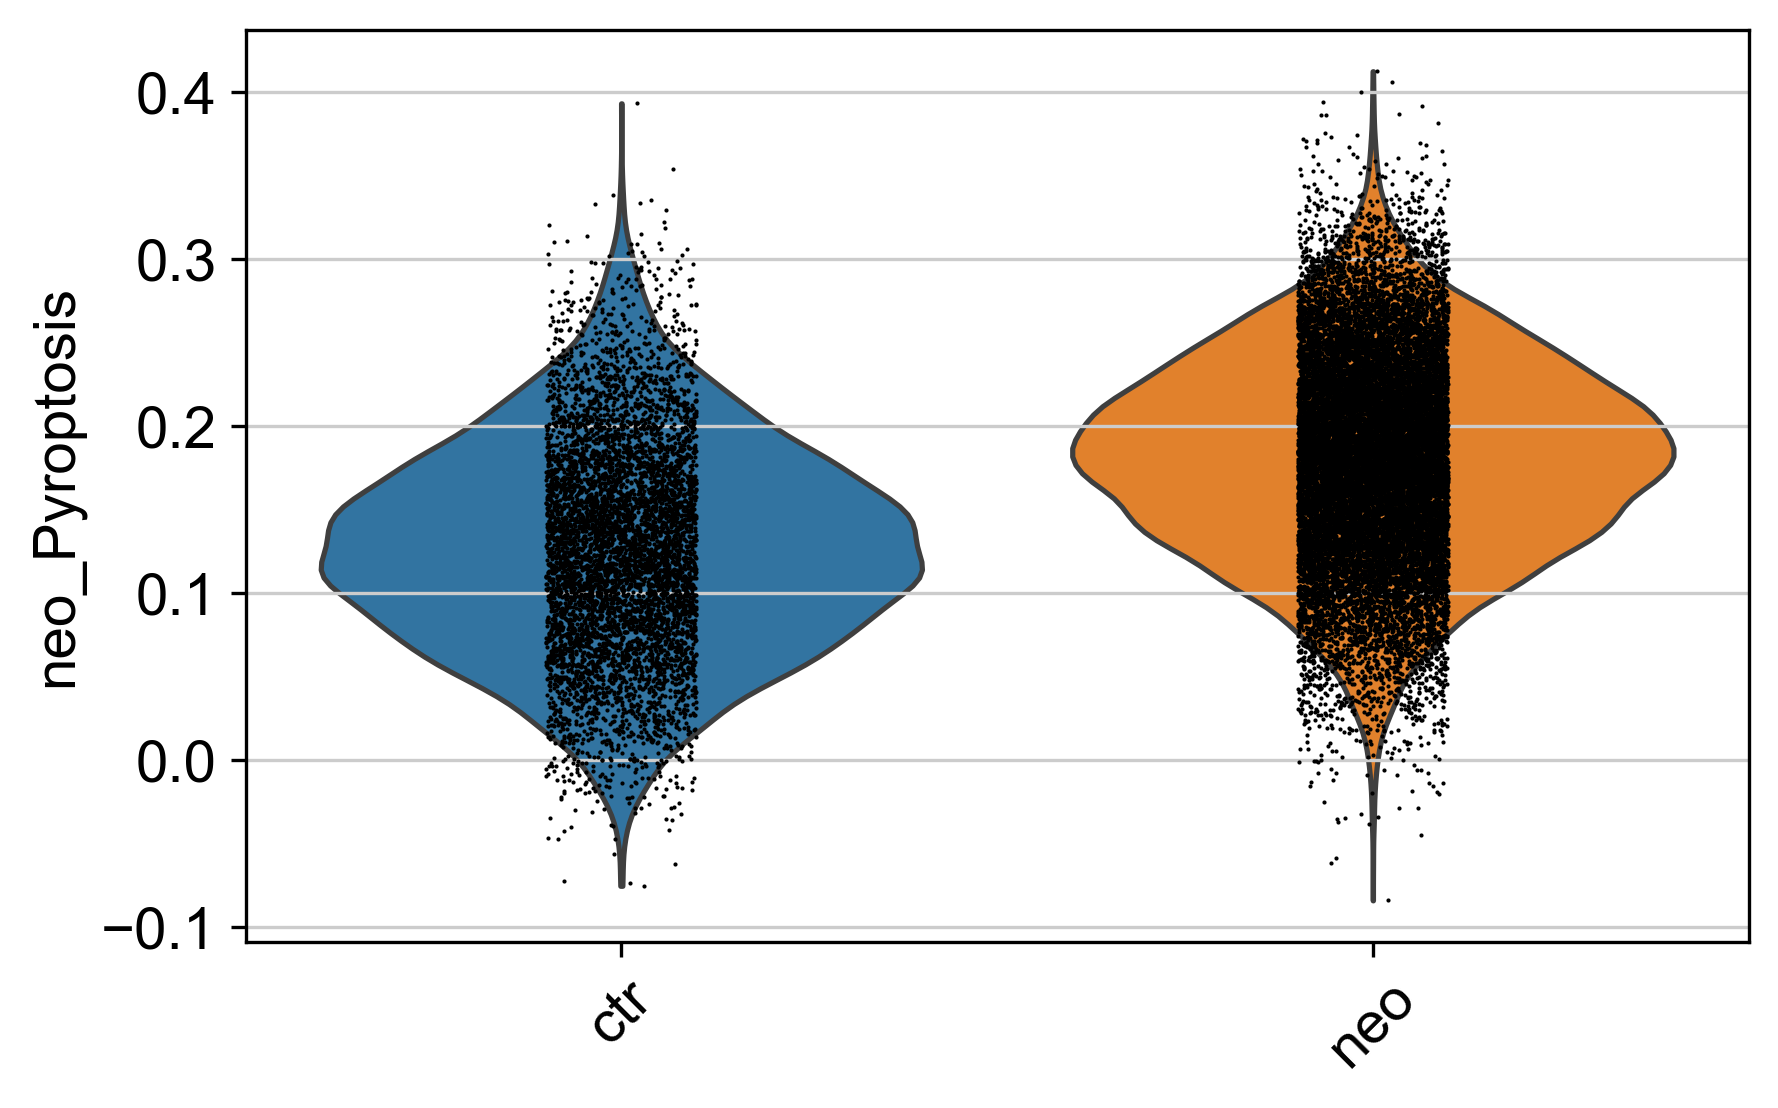

In [16]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata,['neo_Pyroptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_neo_Pyroptosis.pdf'
           )# stripplot


In [17]:
adata.obs['neo_Pyroptosis']

neo1-AAACCCAAGTAGCATA-1-0    0.310265
neo1-AAACCCACAAGACCTT-1-0    0.111855
neo1-AAACCCACATACTGTG-1-0    0.193280
neo1-AAACCCACATGACGTT-1-0    0.180620
neo1-AAACCCATCCCGTTGT-1-0    0.077772
                               ...   
ctr2-TTTGGTTGTCCTACGG-1-1    0.043729
ctr2-TTTGTTGAGAGAGAAC-1-1    0.184518
ctr2-TTTGTTGAGCCACCGT-1-1    0.021755
ctr2-TTTGTTGGTGATGAAT-1-1    0.255343
ctr2-TTTGTTGTCATCCTAT-1-1    0.071408
Name: neo_Pyroptosis, Length: 26265, dtype: float64

In [18]:
adata_neo = adata[adata.obs['treatment']=='neo']
adata_ctr = adata[adata.obs['treatment']=='ctr']

In [19]:
from scipy import stats

In [20]:
stats.ttest_ind(list(np.array(adata_neo.obs['neo_Pyroptosis'])),list(np.array(adata_ctr.obs['neo_Pyroptosis'])))

TtestResult(statistic=61.152884879120734, pvalue=0.0, df=26263.0)

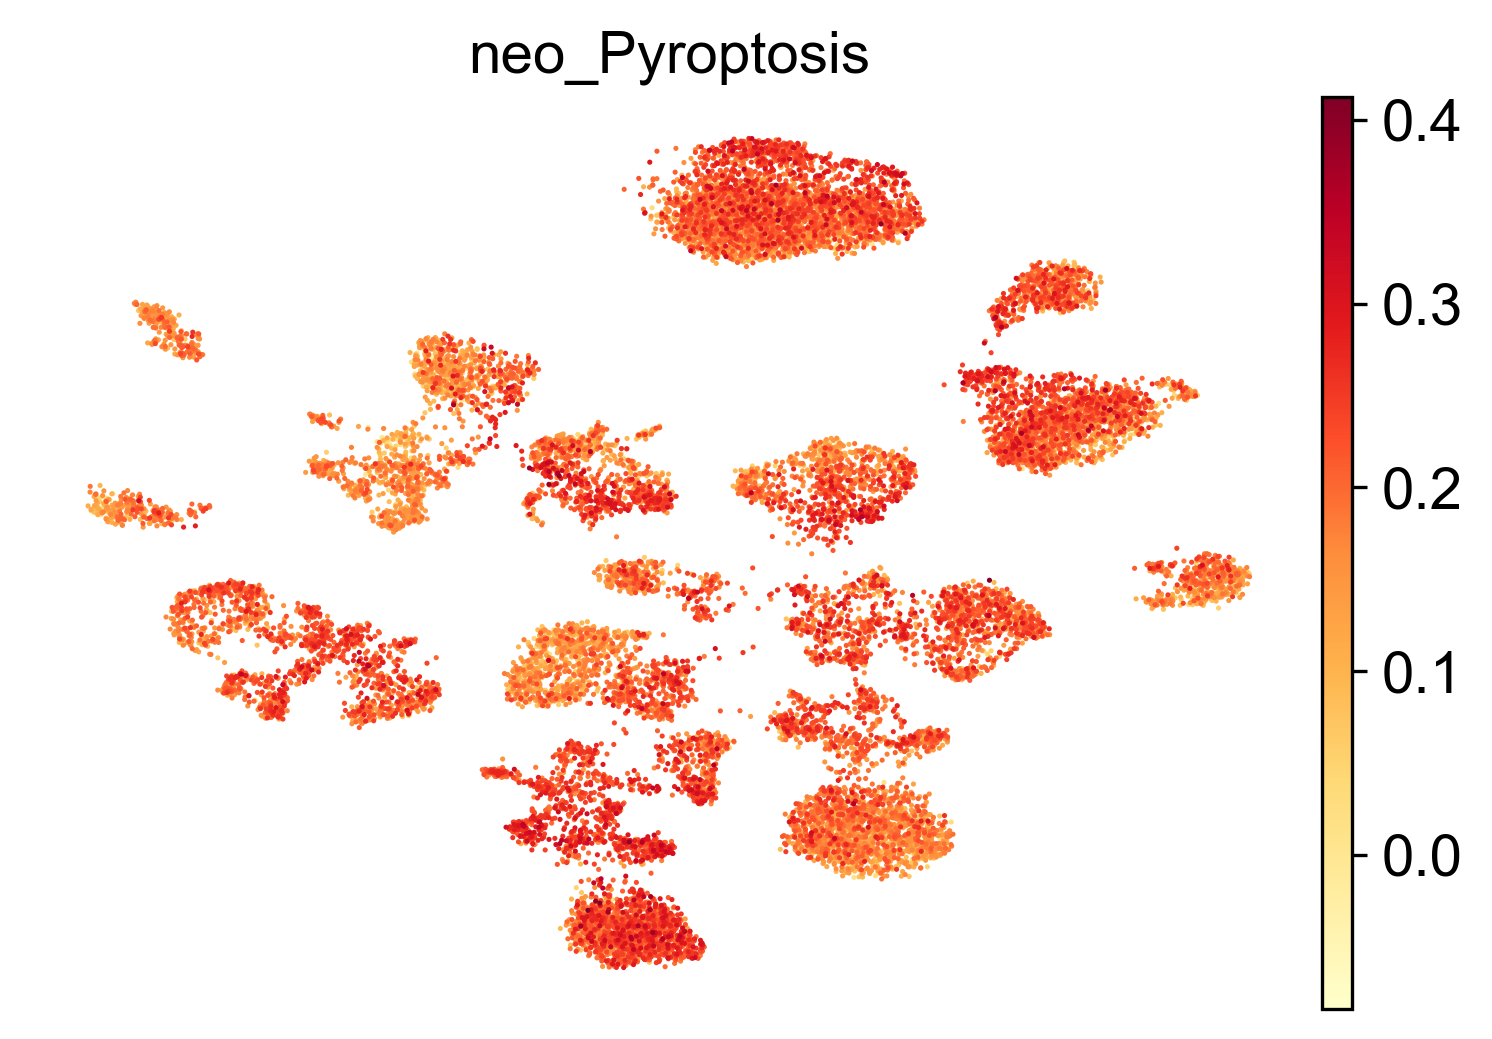

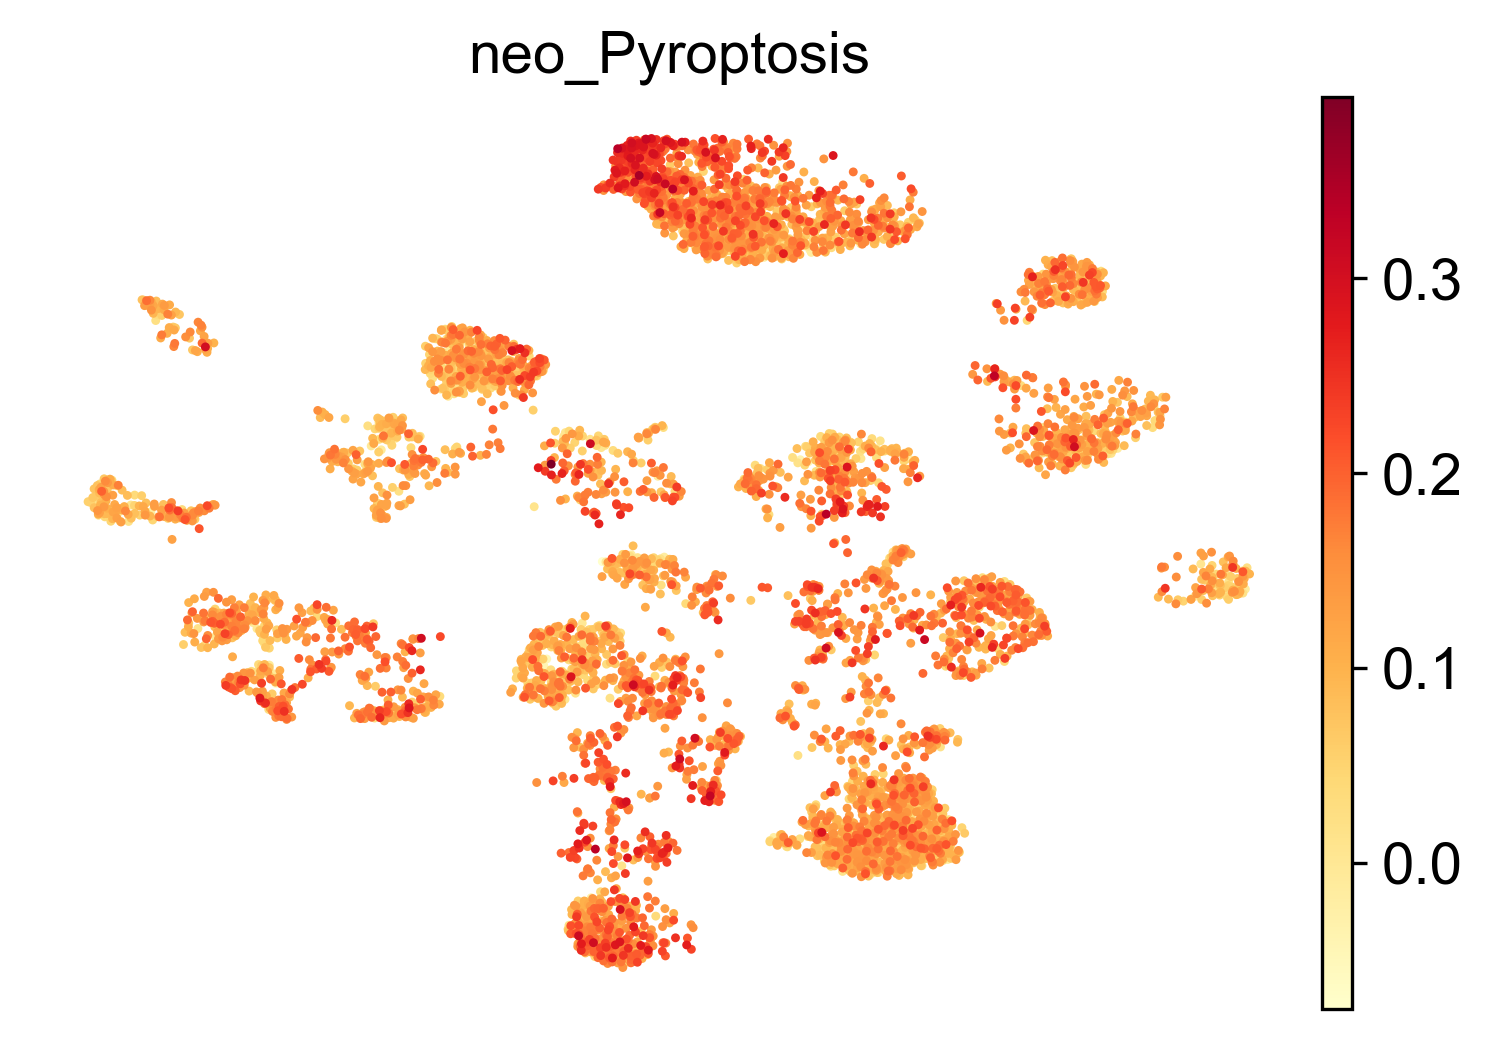

In [21]:
sc.pl.umap(adata_neo,color=['neo_Pyroptosis'],color_map='YlOrRd')
sc.pl.umap(adata_ctr,color=['neo_Pyroptosis'],color_map='YlOrRd')

In [22]:
neo_Apoptosis = pd.read_csv("neo_p21_Apoptosis.csv" )

In [23]:
neo_Apoptosis = neo_Apoptosis["Gene"]

In [24]:
print(neo_Apoptosis)

0        Gsdme
1         Akt3
2         Cav1
3         Ptk2
4        Mapk8
        ...   
143      Psmd7
144       Tspo
145       Rhob
146    Prkar2b
147       Btg2
Name: Gene, Length: 148, dtype: object


In [25]:
sc.tl.score_genes(adata,neo_Apoptosis,score_name = "neo_Apoptosis")

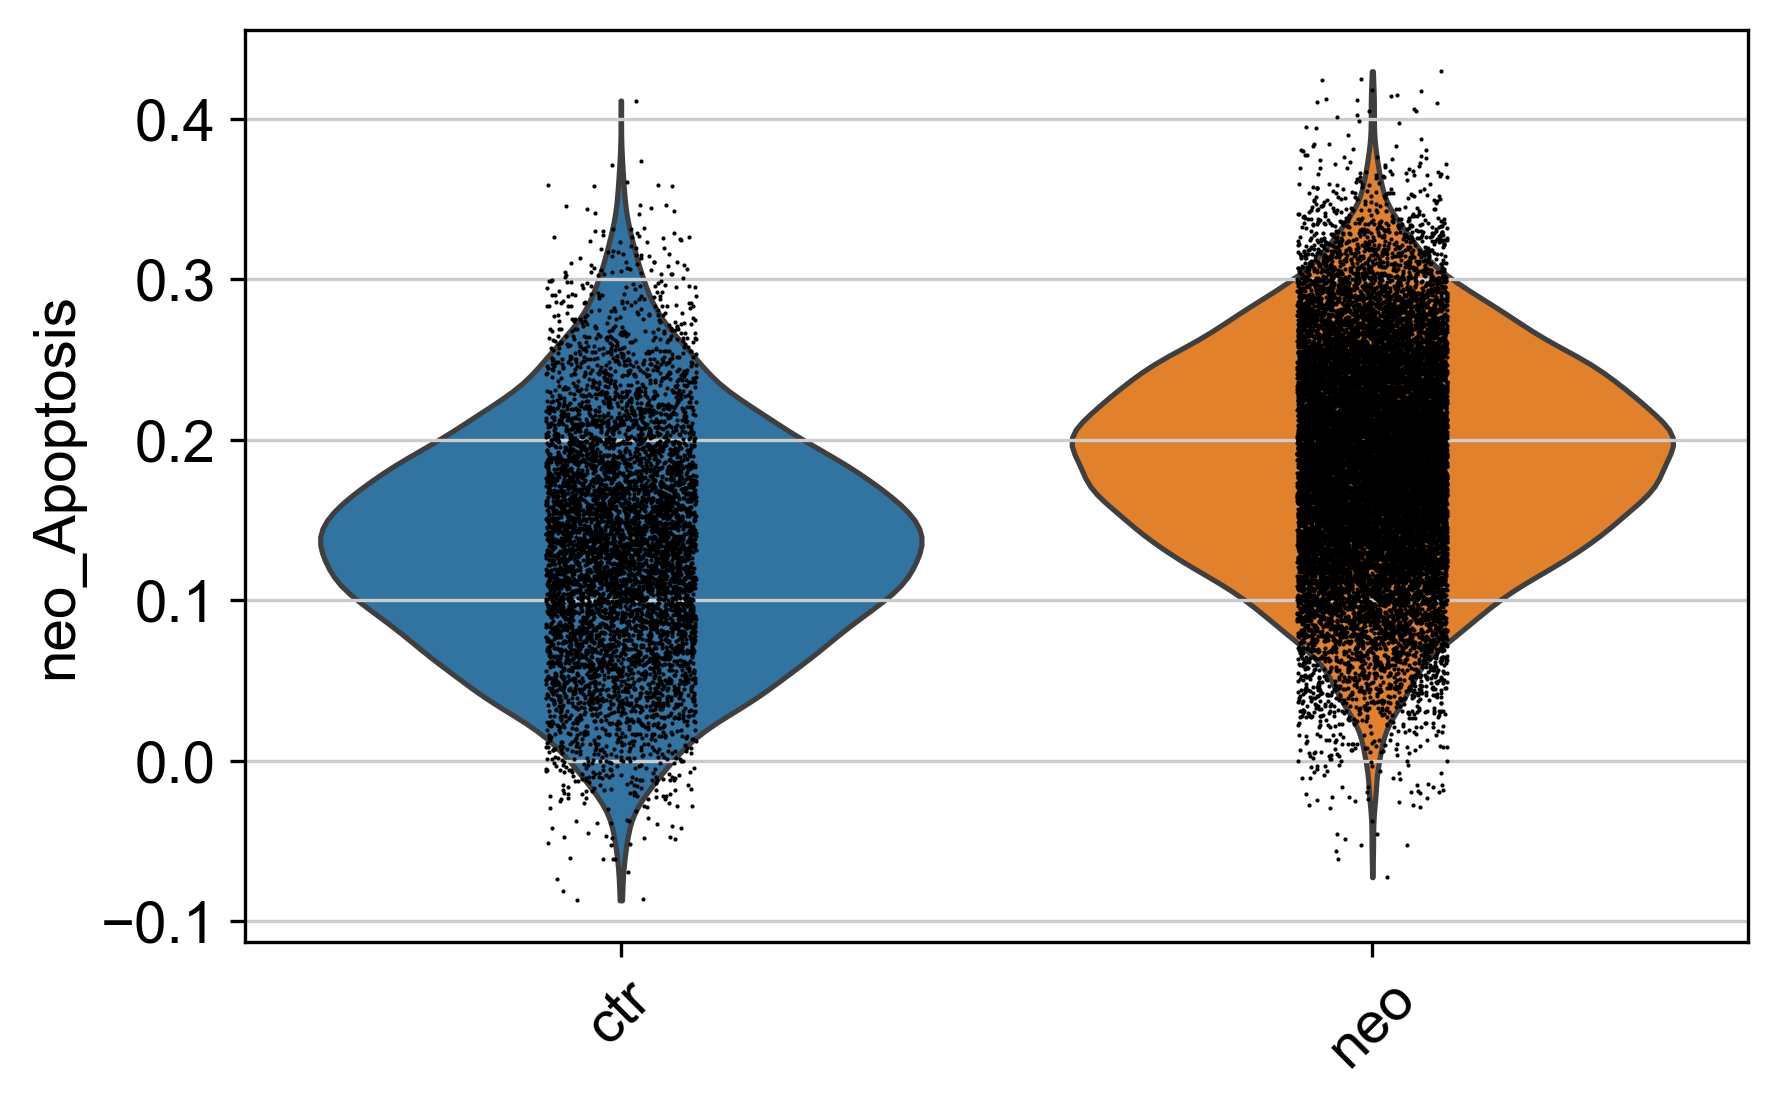

In [26]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata,['neo_Apoptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_neo_Apoptosis.pdf'
           )# stripplot

In [27]:
adata.obs['neo_Apoptosis']

neo1-AAACCCAAGTAGCATA-1-0    0.301329
neo1-AAACCCACAAGACCTT-1-0    0.147292
neo1-AAACCCACATACTGTG-1-0    0.198960
neo1-AAACCCACATGACGTT-1-0    0.180519
neo1-AAACCCATCCCGTTGT-1-0    0.074263
                               ...   
ctr2-TTTGGTTGTCCTACGG-1-1    0.024733
ctr2-TTTGTTGAGAGAGAAC-1-1    0.208264
ctr2-TTTGTTGAGCCACCGT-1-1    0.006416
ctr2-TTTGTTGGTGATGAAT-1-1    0.283653
ctr2-TTTGTTGTCATCCTAT-1-1    0.095962
Name: neo_Apoptosis, Length: 26265, dtype: float64

In [28]:
neo_Necroptosis = pd.read_csv("neo_p21_Necroptosis.csv" )

In [29]:
neo_Necroptosis = neo_Necroptosis["Gene"]

In [30]:
print(neo_Necroptosis)

0      Pla2g4a
1        Mapk8
2        Trpm7
3         Faf1
4         Xiap
5       Camk2d
6         Cyld
7         Bcl2
8         Jak2
9        Stat3
10        Irf9
11      Spata2
12       Birc2
13       Glud1
14        Jak1
15      Pycard
16       Vps4b
17        Tlr4
18        Ppid
19       Stat2
20       Dnm1l
21      Sqstm1
22       Parp3
23      Chmp2a
24        Ppia
25       Stat1
26       Aifm1
27        Zbp1
28       Pgam5
29    Hsp90aa1
30       Ripk1
31       Mapk9
32        Tlr3
33     Tnfsf10
34       Birc3
35         Bax
36         Fas
37        Tyk2
38       Traf5
39       Parp2
40        Mlkl
41       Chmp3
42      Chmp2b
43       Stat6
44     Pla2g4c
45        Pygb
46     Tnfaip3
Name: Gene, dtype: object


In [31]:
sc.tl.score_genes(adata,neo_Necroptosis,score_name = "neo_Necroptosis")

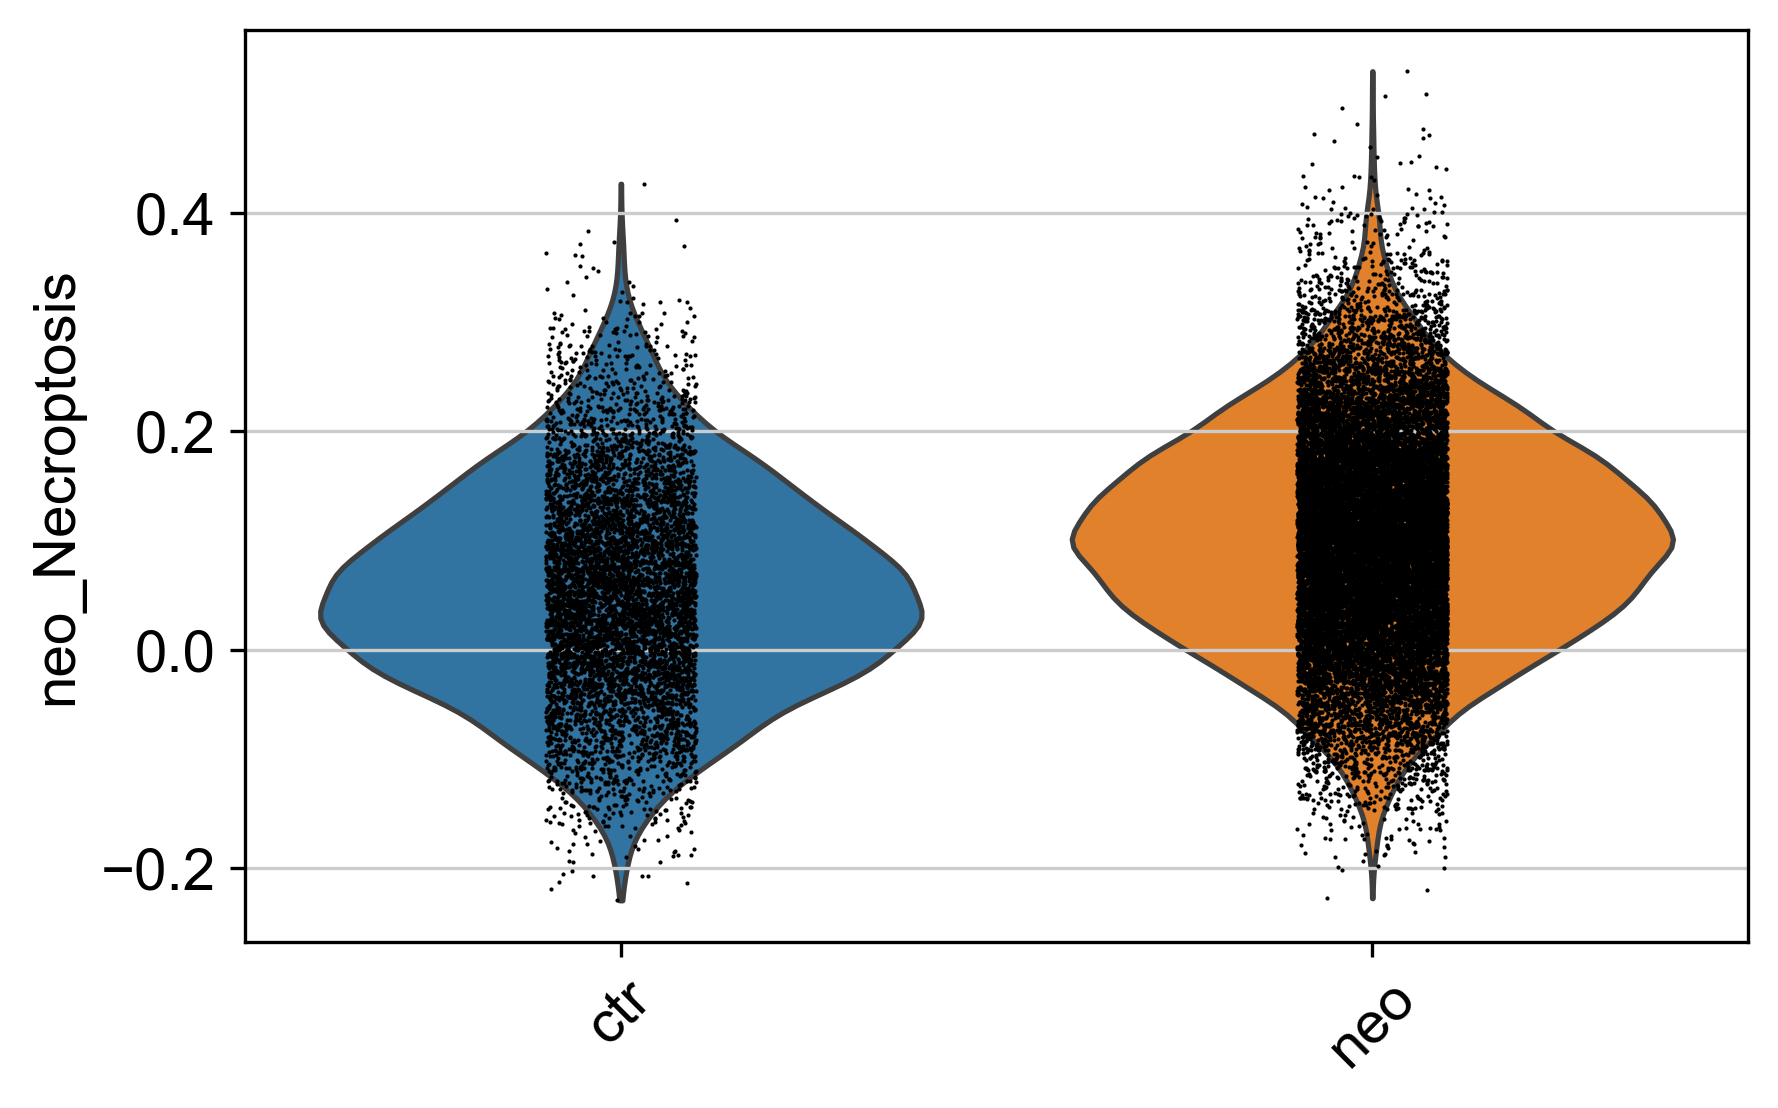

In [32]:
sc.set_figure_params(figsize=(6,4),frameon= False,dpi=150,dpi_save=600)
sc.pl.violin(adata,['neo_Necroptosis'],groupby='treatment',jitter= True,
             rotation =45,save= 'P21_neo_Necroptosis.pdf'
                   )

In [33]:
adata.obs['neo_Necroptosis']

neo1-AAACCCAAGTAGCATA-1-0    0.253998
neo1-AAACCCACAAGACCTT-1-0    0.009059
neo1-AAACCCACATACTGTG-1-0    0.025810
neo1-AAACCCACATGACGTT-1-0    0.112977
neo1-AAACCCATCCCGTTGT-1-0    0.026928
                               ...   
ctr2-TTTGGTTGTCCTACGG-1-1    0.007108
ctr2-TTTGTTGAGAGAGAAC-1-1    0.107389
ctr2-TTTGTTGAGCCACCGT-1-1    0.005600
ctr2-TTTGTTGGTGATGAAT-1-1    0.052159
ctr2-TTTGTTGTCATCCTAT-1-1   -0.026373
Name: neo_Necroptosis, Length: 26265, dtype: float64

In [34]:
adata_neo = adata[adata.obs['treatment']=='neo']
adata_ctr = adata[adata.obs['treatment']=='ctr']

In [35]:
from scipy import stats

In [36]:
stats.ttest_ind(list(np.array(adata_neo.obs['neo_Pyroptosis'])),list(np.array(adata_ctr.obs['neo_Pyroptosis'])))

TtestResult(statistic=61.152884879120734, pvalue=0.0, df=26263.0)

In [37]:
stats.ttest_ind(list(np.array(adata_neo.obs['neo_Apoptosis'])),list(np.array(adata_ctr.obs['neo_Apoptosis'])))

TtestResult(statistic=56.53991587825118, pvalue=0.0, df=26263.0)

In [38]:
stats.ttest_ind(list(np.array(adata_neo.obs['neo_Necroptosis'])),list(np.array(adata_ctr.obs['neo_Necroptosis'])))

TtestResult(statistic=34.68547672675895, pvalue=8.554266457138469e-258, df=26263.0)

In [39]:
adata.obs['cell_type2']

neo1-AAACCCAAGTAGCATA-1-0         Sp/Rt
neo1-AAACCCACAAGACCTT-1-0           TBC
neo1-AAACCCACATACTGTG-1-0            Is
neo1-AAACCCACATGACGTT-1-0            Bs
neo1-AAACCCATCCCGTTGT-1-0           OHC
                                ...    
ctr2-TTTGGTTGTCCTACGG-1-1    TypeII_SGN
ctr2-TTTGTTGAGAGAGAAC-1-1            Is
ctr2-TTTGTTGAGCCACCGT-1-1    TypeII_SGN
ctr2-TTTGTTGGTGATGAAT-1-1            Bs
ctr2-TTTGTTGTCATCCTAT-1-1            Is
Name: cell_type2, Length: 26265, dtype: category
Categories (16, object): ['Bs', 'DC_PC', 'Fb', 'IBC_IPh_HeC', ..., 'Sp/Rt', 'TBC', 'TypeII_SGN', 'TypeI_SGN']

In [42]:
adata_HC = adata[adata.obs['cell_type2'].isin(['IHC','OHC'])]
adata_HC

View of AnnData object with n_obs × n_vars = 693 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5', 'neo_Pyroptosis', 'neo_Apoptosis', 'neo_Necroptosis'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

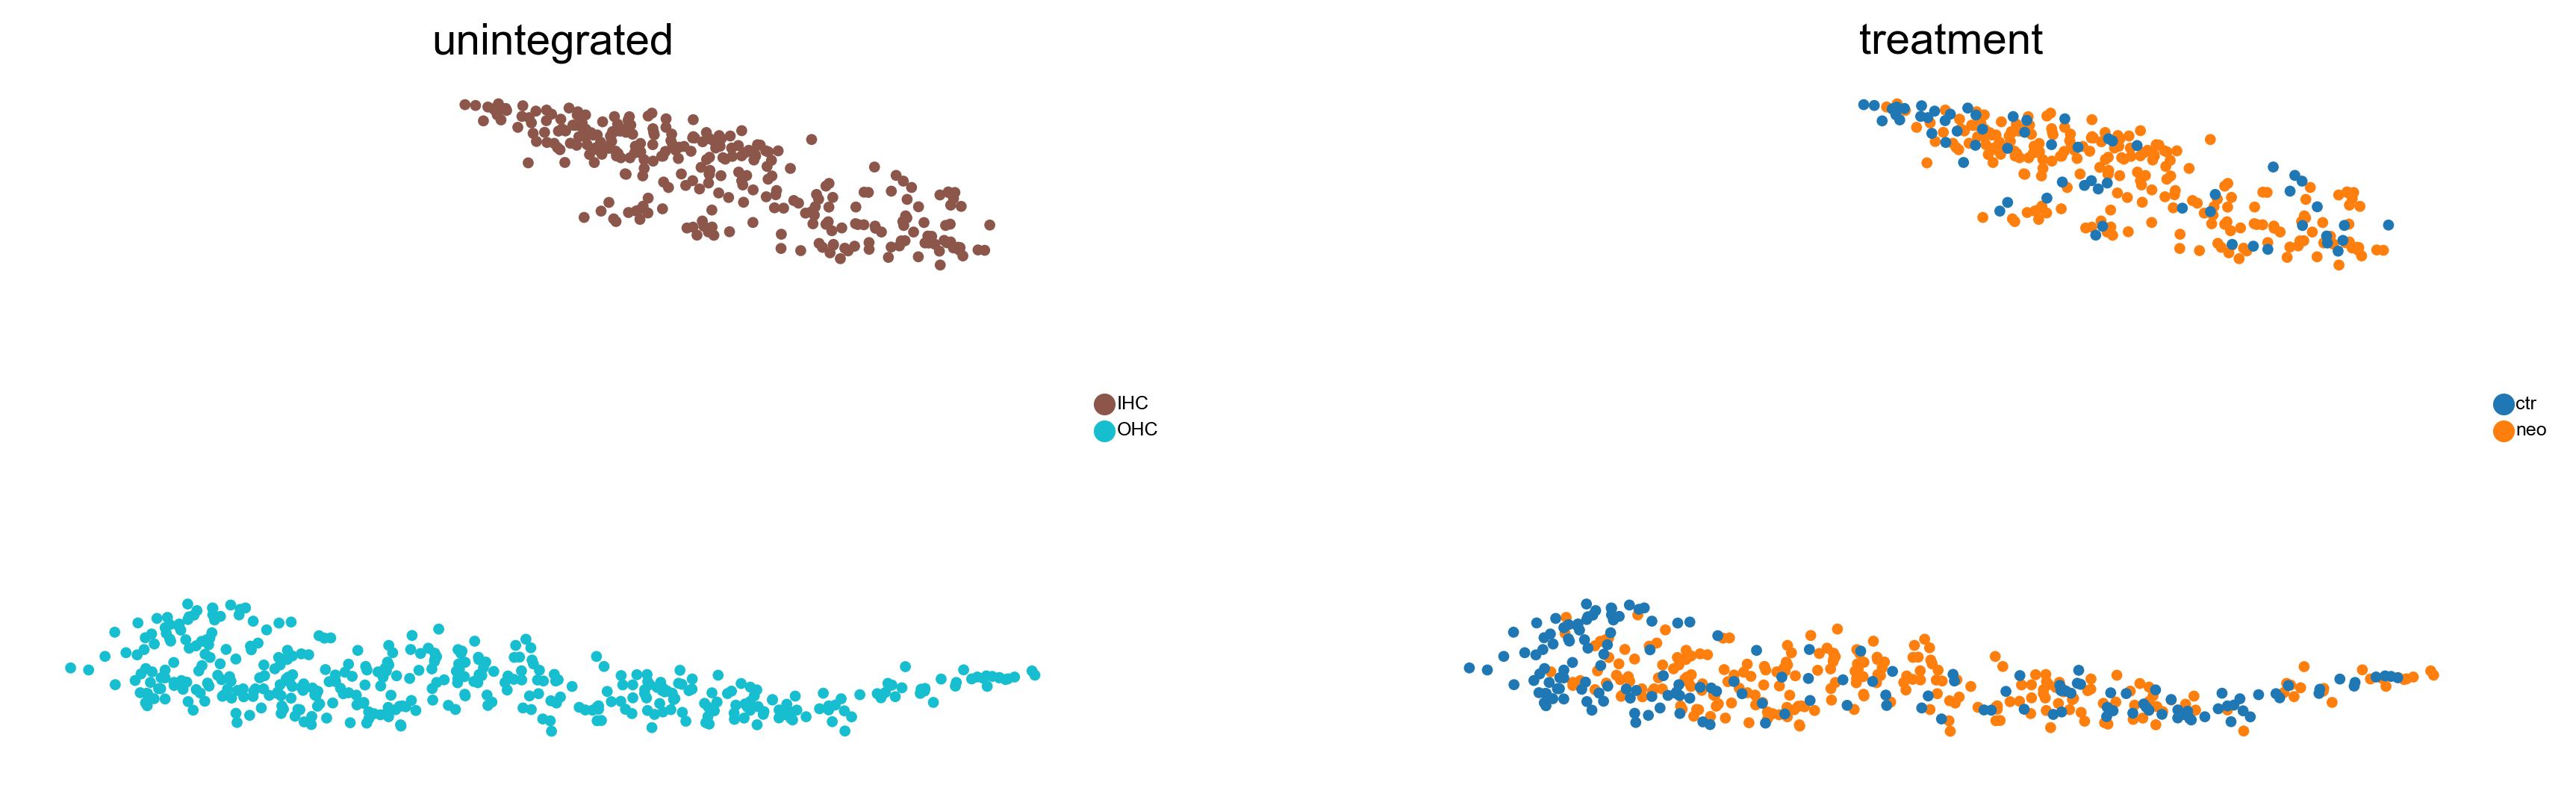

In [43]:
sc.pl.umap(adata_HC, color=['cell_type2','treatment'], wspace=0.2,
           size=50,
           legend_fontsize=6,ncols = 2,title='unintegrated',)

In [44]:
sc.pp.highly_variable_genes(adata_HC)
sc.tl.pca(adata_HC)
sc.pp.neighbors(adata_HC)
sc.tl.umap(adata_HC)
adata_HC

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


AnnData object with n_obs × n_vars = 693 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5', 'neo_Pyroptosis', 'neo_Apoptosis', 'neo_Necroptosis'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups', 'hvg', 'pca'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

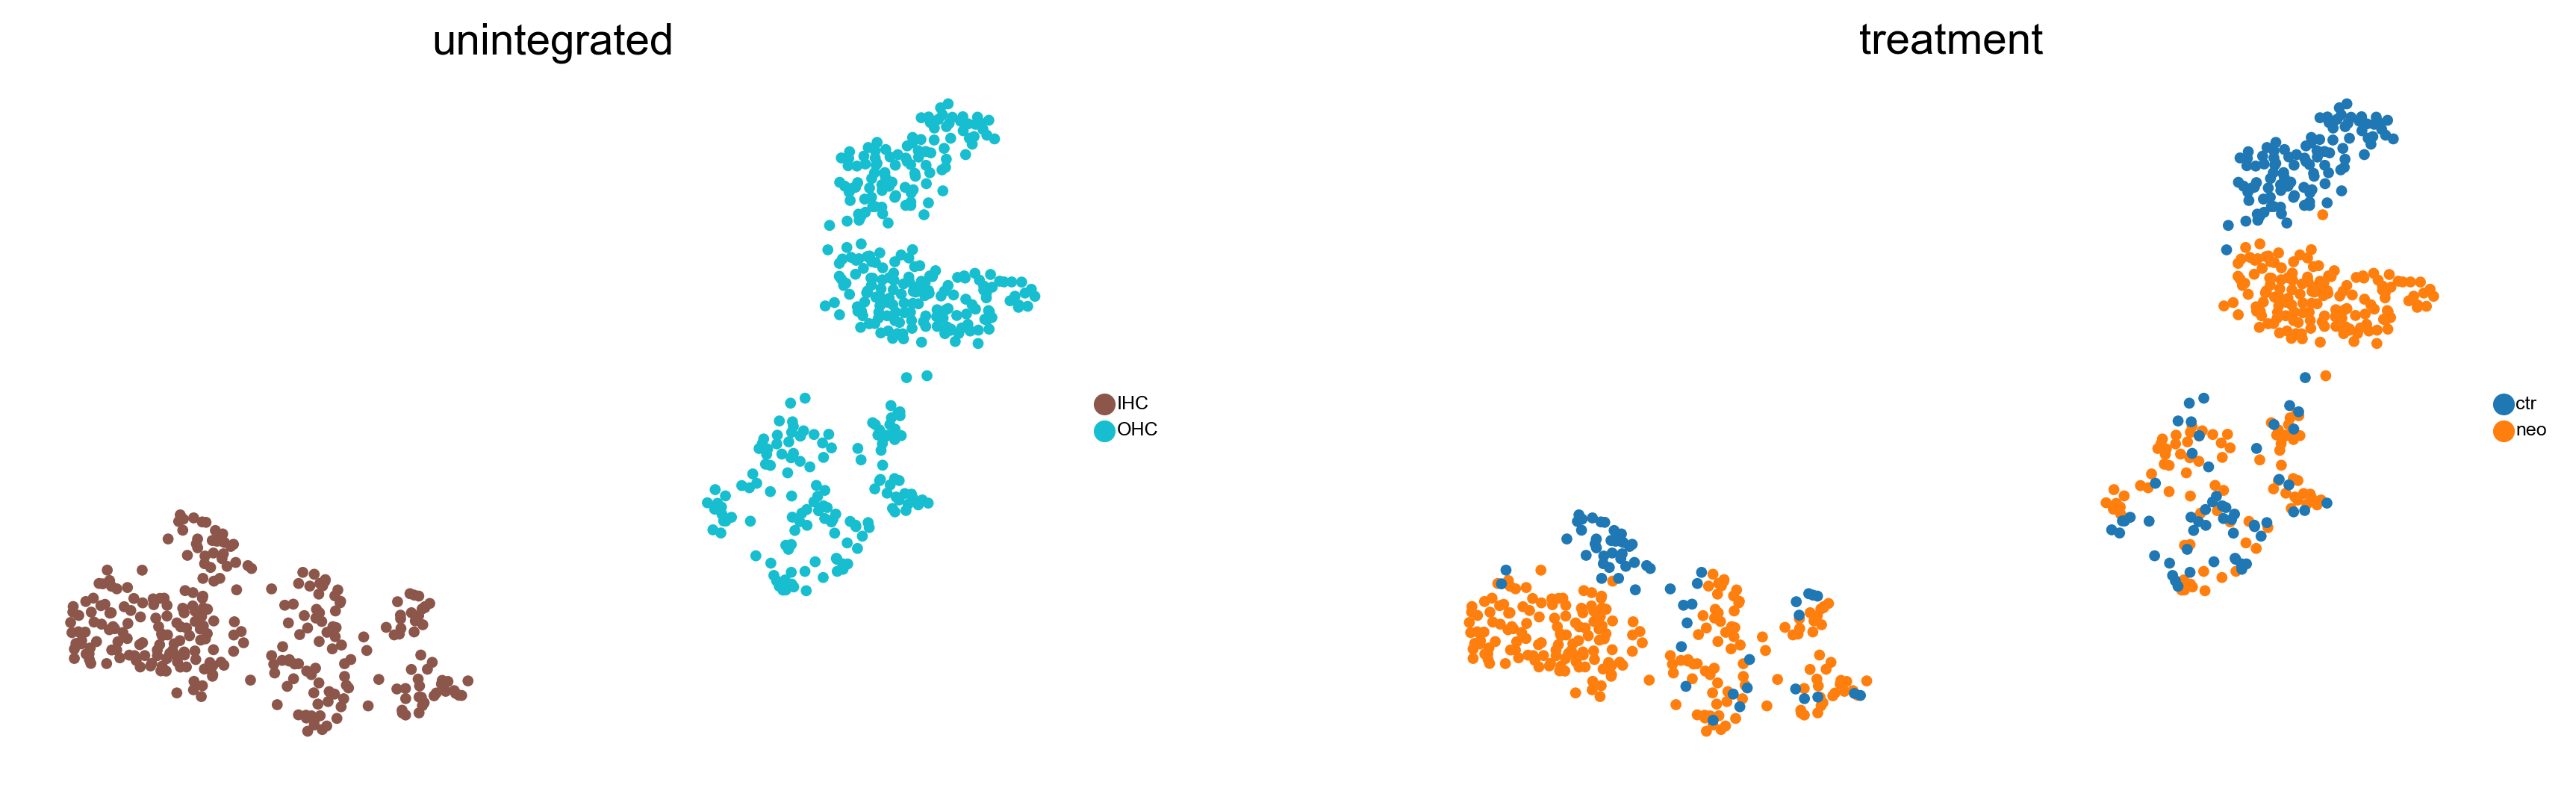

In [46]:
sc.pl.umap(adata_HC, color=['cell_type2','treatment'], wspace=0.2,
           size=50,
           legend_fontsize=6,ncols = 2,title='unintegrated',
          )

In [47]:
sc.pp.highly_variable_genes(
    adata_HC, n_top_genes=10000, flavor="seurat_v3", batch_key='treatment'
)
adata_HC.var

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Gene     mt  n_cells_by_counts-0  mean_counts-0  \
Xkr4              Xkr4  False                 4933       1.087582   
Gm1992          Gm1992  False                  806       0.054914   
Gm19938        Gm19938  False                 1034       0.058647   
Gm37381        Gm37381  False                   39       0.002256   
Rp1                Rp1  False                  301       0.013845   
...                ...    ...                  ...            ...   
AC124606.1  AC124606.1  False                    0       0.000000   
AC133095.2  AC133095.2  False                    0       0.000000   
AC133095.1  AC133095.1  False                    0       0.000000   
AC234645.1  AC234645.1  False                    0       0.000000   
AC149090.1  AC149090.1  False                 8908       0.702213   

            pct_dropout_by_counts-0  total_counts-0  highly_variable-0  \
Xkr4                      80.815152         27965.0               True   
Gm1992                    96.865399          1412.0              False   
Gm19938                   95.978688          1508.0              False   
Gm37381                   99.848326            58.0              False   
Rp1                       98.829386           356.0               True   
...                             ...             ...                ...   
AC124606.1               100.000000             0.0              False   
AC133095.2               100.000000             0.0              False   
AC133095.1               100.000000             0.0              False   
AC234645.1               100.000000             0.0              False   
AC149090.1                65.356046         18056.0              False   

                 means-0  dispersions-0  dispersions_norm-0  ...  \
Xkr4        7.697968e-01       2.590413            2.156146  ...   
Gm1992      4.117453e-02       1.391556           -0.089812  ...   
Gm19938     6.330676e-02       1.612726            0.315698  ...   
Gm37381     3.327192e-03       1.515693            0.137791  ...   
Rp1         2.810835e-02       1.741533            0.551864  ...   
...                  ...            ...                 ...  ...   
AC124606.1  1.000000e-12            NaN            0.000000  ...   
AC133095.2  1.000000e-12            NaN            0.000000  ...   
AC133095.1  1.000000e-12            NaN            0.000000  ...   
AC234645.1  1.000000e-12            NaN            0.000000  ...   
AC149090.1  7.518185e-01       1.605107           -0.453410  ...   

            dispersions-1  dispersions_norm-1  highly_variable     means  \
Xkr4             3.106185            2.536828             True  0.118583   
Gm1992           1.966171            0.440522             True  0.008303   
Gm19938          1.484790           -0.275193             True  0.018674   
Gm37381          2.371948            1.043832            False  0.000000   
Rp1              1.947506            0.412772            False  0.008193   
...                   ...                 ...              ...       ...   
AC124606.1            NaN            0.000000            False  0.000000   
AC133095.2            NaN            0.000000            False  0.000000   
AC133095.1            NaN            0.000000            False  0.000000   
AC234645.1            NaN            0.000000            False  0.000000   
AC149090.1       1.919803           -0.578813             True  0.368005   

            dispersions  dispersions_norm  highly_variable_rank  variances  \
Xkr4           0.281159          2.719629                1831.5   0.092292   
Gm1992         0.284908          0.778438                4547.0   0.006899   
Gm19938        0.238009          0.497753                1905.0   0.014532   
Gm37381             NaN               NaN                   NaN   0.000000   
Rp1            0.117815         -0.221595                   NaN   0.005974   
...                 ...               ...                   ...        ...   
AC124606.1          NaN 

In [48]:
n_batches = adata_HC.var["highly_variable_nbatches"].value_counts()
n_batches
adata_hvg = adata_HC[:, adata_HC.var["highly_variable"]].copy()
adata_hvg

AnnData object with n_obs × n_vars = 693 × 10000
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5', 'neo_Pyroptosis', 'neo_Apoptosis', 'neo_Necroptosis'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups', 'hvg', 'pca'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    varm: 'PCs'
    lay

In [49]:
adata_scvi = adata_hvg.copy()
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key='treatment',)
adata_scvi

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


AnnData object with n_obs × n_vars = 693 × 10000
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5', 'neo_Pyroptosis', 'neo_Apoptosis', 'neo_Necroptosis', '_scvi_batch', '_scvi_labels'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups', 'hvg', 'pca', '_scvi_uuid', '_scvi_manager_uu

In [50]:
vae = scvi.model.SCVI(adata_scvi, n_layers=3, n_latent=30)
vae

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 3, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [51]:
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\DELL\.conda\envs\python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
C:\Users\DELL\.conda\envs\python39\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 1/400:   0%|                                                                             | 0/400 [00:00<?, ?it/s]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%|         | 1/400 [00:00<02:18,  2.88it/s, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=6.06e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/400:   0%|         | 2/400 [00:00<01:49,  3.64it/s, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.58e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/400:   1%|         | 3/400 [00:00<01:39,  3.99it/s, v_num=1, train_loss_step=5.07e+3, train_loss_epoch=5.21e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/400:   1%|         | 4/400 [00:01<01:34,  4.19it/s, v_num=1, train_loss_step=4.81e+3, train_loss_epoch=4.94e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/400:   1%|         | 5/400 [00:01<01:32,  4.28it/s, v_num=1, train_loss_step=4.63e+3, train_loss_epoch=4.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/400:   2%|▏         | 6/400 [00:01<01:31,  4.32it/s, v_num=1, train_loss_step=4.6e+3, train_loss_epoch=4.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/400:   2%|▏        | 7/400 [00:01<01:31,  4.31it/s, v_num=1, train_loss_step=4.55e+3, train_loss_epoch=4.52e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/400:   2%|▏        | 8/400 [00:01<01:30,  4.31it/s, v_num=1, train_loss_step=4.47e+3, train_loss_epoch=4.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/400:   2%|▏       | 9/400 [00:02<01:29,  4.39it/s, v_num=1, train_loss_step=4.33e+3, train_loss_epoch=4.37e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 11/400:   2%|▏      | 10/400 [00:02<01:28,  4.40it/s, v_num=1, train_loss_step=4.32e+3, train_loss_epoch=4.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 12/400:   3%|▏      | 11/400 [00:02<01:28,  4.40it/s, v_num=1, train_loss_step=4.26e+3, train_loss_epoch=4.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 13/400:   3%|▏      | 12/400 [00:02<01:27,  4.44it/s, v_num=1, train_loss_step=4.16e+3, train_loss_epoch=4.22e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 14/400:   3%|▏      | 13/400 [00:03<01:27,  4.44it/s, v_num=1, train_loss_step=4.15e+3, train_loss_epoch=4.19e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 15/400:   4%|▏      | 14/400 [00:03<01:27,  4.44it/s, v_num=1, train_loss_step=4.14e+3, train_loss_epoch=4.16e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/400:   4%|▎      | 15/400 [00:03<01:27,  4.38it/s, v_num=1, train_loss_step=4.19e+3, train_loss_epoch=4.14e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 17/400:   4%|▎      | 16/400 [00:03<01:27,  4.39it/s, v_num=1, train_loss_step=4.08e+3, train_loss_epoch=4.13e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 18/400:   4%|▎      | 17/400 [00:03<01:26,  4.42it/s, v_num=1, train_loss_step=4.16e+3, train_loss_epoch=4.11e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 19/400:   4%|▎       | 18/400 [00:04<01:25,  4.45it/s, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=4.1e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 20/400:   5%|▍       | 19/400 [00:04<01:25,  4.46it/s, v_num=1, train_loss_step=4.1e+3, train_loss_epoch=4.09e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 21/400:   5%|▎      | 20/400 [00:04<01:28,  4.30it/s, v_num=1, train_loss_step=4.05e+3, train_loss_epoch=4.08e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 22/400:   5%|▎      | 21/400 [00:04<01:26,  4.38it/s, v_num=1, train_loss_step=4.08e+3, train_loss_epoch=4.07e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 23/400:   6%|▍      | 22/400 [00:05<01:25,  4.41it/s, v_num=1, train_loss_step=4.03e+3, train_loss_epoch=4.07e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 24/400:   6%|▍      | 23/400 [00:05<01:25,  4.43it/s, v_num=1, train_loss_step=4.12e+3, train_loss_epoch=4.06e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 25/400:   6%|▍      | 24/400 [00:05<01:24,  4.44it/s, v_num=1, train_loss_step=4.06e+3, train_loss_epoch=4.05e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 26/400:   6%|▍      | 25/400 [00:05<01:24,  4.43it/s, v_num=1, train_loss_step=3.99e+3, train_loss_epoch=4.05e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 27/400:   6%|▍      | 26/400 [00:05<01:23,  4.47it/s, v_num=1, train_loss_step=4.02e+3, train_loss_epoch=4.04e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 28/400:   7%|▍      | 27/400 [00:06<01:23,  4.49it/s, v_num=1, train_loss_step=4.05e+3, train_loss_epoch=4.04e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 29/400:   7%|▍      | 28/400 [00:06<01:21,  4.55it/s, v_num=1, train_loss_step=4.05e+3, train_loss_epoch=4.03e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 30/400:   8%|▌      | 30/400 [00:06<01:20,  4.59it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=4.03e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 31/400:   8%|▌      | 31/400 [00:07<01:19,  4.64it/s, v_num=1, train_loss_step=4.06e+3, train_loss_epoch=4.03e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 32/400:   8%|▌      | 31/400 [00:07<01:19,  4.64it/s, v_num=1, train_loss_step=4.07e+3, train_loss_epoch=4.02e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 33/400:   8%|▌      | 33/400 [00:07<01:19,  4.61it/s, v_num=1, train_loss_step=3.96e+3, train_loss_epoch=4.02e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 34/400:   8%|▌      | 33/400 [00:07<01:19,  4.61it/s, v_num=1, train_loss_step=4.09e+3, train_loss_epoch=4.02e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 35/400:   8%|▌      | 34/400 [00:07<01:20,  4.55it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=4.01e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 36/400:   9%|▌      | 35/400 [00:07<01:19,  4.58it/s, v_num=1, train_loss_step=3.99e+3, train_loss_epoch=4.01e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 37/400:   9%|▉         | 36/400 [00:08<01:19,  4.58it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 38/400:   9%|▉         | 37/400 [00:08<01:19,  4.58it/s, v_num=1, train_loss_step=4.02e+3, train_loss_epoch=4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 39/400:  10%|▉         | 38/400 [00:08<01:18,  4.61it/s, v_num=1, train_loss_step=4.06e+3, train_loss_epoch=4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 40/400:  10%|▉         | 39/400 [00:08<01:18,  4.57it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 41/400:  10%|▋      | 41/400 [00:09<01:17,  4.61it/s, v_num=1, train_loss_step=3.94e+3, train_loss_epoch=3.99e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 42/400:  10%|▋      | 41/400 [00:09<01:17,  4.61it/s, v_num=1, train_loss_step=3.99e+3, train_loss_epoch=3.99e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 43/400:  10%|▋      | 42/400 [00:09<01:17,  4.61it/s, v_num=1, train_loss_step=4.02e+3, train_loss_epoch=3.99e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 44/400:  11%|▊      | 43/400 [00:09<01:17,  4.61it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=3.98e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 45/400:  11%|▊      | 45/400 [00:10<01:16,  4.63it/s, v_num=1, train_loss_step=3.96e+3, train_loss_epoch=3.98e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 46/400:  11%|▊      | 45/400 [00:10<01:16,  4.63it/s, v_num=1, train_loss_step=3.96e+3, train_loss_epoch=3.98e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 47/400:  12%|▊      | 46/400 [00:10<01:16,  4.63it/s, v_num=1, train_loss_step=3.89e+3, train_loss_epoch=3.98e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 48/400:  12%|▊      | 47/400 [00:10<01:16,  4.59it/s, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.97e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 49/400:  12%|▊      | 48/400 [00:10<01:16,  4.59it/s, v_num=1, train_loss_step=4.02e+3, train_loss_epoch=3.97e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 50/400:  12%|▊      | 49/400 [00:10<01:16,  4.61it/s, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=3.97e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 51/400:  12%|▉      | 50/400 [00:11<01:16,  4.60it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.96e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 52/400:  13%|▉      | 51/400 [00:11<01:15,  4.59it/s, v_num=1, train_loss_step=4.03e+3, train_loss_epoch=3.96e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 53/400:  13%|▉      | 53/400 [00:11<01:15,  4.59it/s, v_num=1, train_loss_step=3.96e+3, train_loss_epoch=3.96e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 54/400:  13%|█       | 53/400 [00:11<01:15,  4.59it/s, v_num=1, train_loss_step=3.9e+3, train_loss_epoch=3.96e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 55/400:  14%|▉      | 55/400 [00:12<01:15,  4.60it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.95e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 56/400:  14%|▉      | 55/400 [00:12<01:15,  4.60it/s, v_num=1, train_loss_step=3.94e+3, train_loss_epoch=3.95e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 57/400:  14%|█       | 56/400 [00:12<01:14,  4.62it/s, v_num=1, train_loss_step=3.9e+3, train_loss_epoch=3.95e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 58/400:  14%|█▍        | 58/400 [00:12<01:13,  4.63it/s, v_num=1, train_loss_step=4e+3, train_loss_epoch=3.95e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 59/400:  14%|█      | 58/400 [00:12<01:13,  4.63it/s, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.94e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 60/400:  15%|█      | 59/400 [00:13<01:15,  4.55it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.94e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 61/400:  15%|█      | 60/400 [00:13<01:16,  4.44it/s, v_num=1, train_loss_step=3.97e+3, train_loss_epoch=3.94e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 62/400:  15%|█      | 61/400 [00:13<01:16,  4.43it/s, v_num=1, train_loss_step=3.92e+3, train_loss_epoch=3.94e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 63/400:  16%|█      | 62/400 [00:13<01:17,  4.37it/s, v_num=1, train_loss_step=3.97e+3, train_loss_epoch=3.93e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 64/400:  16%|█      | 63/400 [00:14<01:17,  4.33it/s, v_num=1, train_loss_step=3.91e+3, train_loss_epoch=3.93e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 65/400:  16%|█      | 64/400 [00:14<01:17,  4.33it/s, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.93e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 66/400:  16%|█▎      | 65/400 [00:14<01:16,  4.40it/s, v_num=1, train_loss_step=3.9e+3, train_loss_epoch=3.93e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 67/400:  16%|█▏     | 66/400 [00:14<01:14,  4.45it/s, v_num=1, train_loss_step=3.89e+3, train_loss_epoch=3.92e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 68/400:  17%|█▏     | 67/400 [00:14<01:14,  4.46it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.92e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 69/400:  17%|█▏     | 68/400 [00:15<01:13,  4.49it/s, v_num=1, train_loss_step=3.86e+3, train_loss_epoch=3.92e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 70/400:  17%|█▏     | 69/400 [00:15<01:14,  4.46it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.91e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 71/400:  18%|█▏     | 70/400 [00:15<01:13,  4.47it/s, v_num=1, train_loss_step=3.98e+3, train_loss_epoch=3.91e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 72/400:  18%|█▏     | 71/400 [00:15<01:13,  4.46it/s, v_num=1, train_loss_step=3.87e+3, train_loss_epoch=3.91e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 73/400:  18%|█▎     | 72/400 [00:16<01:15,  4.36it/s, v_num=1, train_loss_step=3.92e+3, train_loss_epoch=3.91e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 74/400:  18%|█▎     | 73/400 [00:16<01:15,  4.30it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.91e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 75/400:  18%|█▍      | 74/400 [00:16<01:16,  4.24it/s, v_num=1, train_loss_step=3.86e+3, train_loss_epoch=3.9e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 76/400:  19%|█▌      | 75/400 [00:16<01:16,  4.23it/s, v_num=1, train_loss_step=3.94e+3, train_loss_epoch=3.9e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 77/400:  19%|█▋       | 76/400 [00:17<01:16,  4.22it/s, v_num=1, train_loss_step=3.9e+3, train_loss_epoch=3.9e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 78/400:  19%|█▌      | 77/400 [00:17<01:16,  4.20it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.9e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 79/400:  20%|█▎     | 78/400 [00:17<01:14,  4.30it/s, v_num=1, train_loss_step=3.89e+3, train_loss_epoch=3.89e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 80/400:  20%|█▍     | 79/400 [00:17<01:13,  4.37it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.89e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 81/400:  20%|█▍     | 80/400 [00:17<01:12,  4.42it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.89e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 82/400:  20%|█▍     | 81/400 [00:18<01:11,  4.45it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.89e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 83/400:  20%|█▍     | 82/400 [00:18<01:10,  4.49it/s, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.88e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 84/400:  21%|█▍     | 83/400 [00:18<01:10,  4.52it/s, v_num=1, train_loss_step=3.94e+3, train_loss_epoch=3.88e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 85/400:  21%|█▍     | 84/400 [00:18<01:10,  4.51it/s, v_num=1, train_loss_step=3.89e+3, train_loss_epoch=3.88e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 86/400:  21%|█▍     | 85/400 [00:19<01:09,  4.51it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.87e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 87/400:  22%|█▌     | 86/400 [00:19<01:09,  4.49it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.87e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 88/400:  22%|█▌     | 87/400 [00:19<01:09,  4.50it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.87e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 89/400:  22%|█▌     | 88/400 [00:19<01:09,  4.49it/s, v_num=1, train_loss_step=3.93e+3, train_loss_epoch=3.87e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 90/400:  22%|█▌     | 89/400 [00:19<01:09,  4.49it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.86e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 91/400:  22%|█▌     | 90/400 [00:20<01:08,  4.52it/s, v_num=1, train_loss_step=3.86e+3, train_loss_epoch=3.86e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 92/400:  23%|█▌     | 91/400 [00:20<01:08,  4.53it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.86e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 93/400:  23%|█▌     | 92/400 [00:20<01:07,  4.53it/s, v_num=1, train_loss_step=3.88e+3, train_loss_epoch=3.86e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 94/400:  23%|█▋     | 93/400 [00:20<01:07,  4.54it/s, v_num=1, train_loss_step=3.85e+3, train_loss_epoch=3.86e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 95/400:  24%|█▉      | 94/400 [00:21<01:07,  4.55it/s, v_num=1, train_loss_step=3.9e+3, train_loss_epoch=3.85e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 96/400:  24%|█▋     | 95/400 [00:21<01:07,  4.55it/s, v_num=1, train_loss_step=3.91e+3, train_loss_epoch=3.85e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 97/400:  24%|█▋     | 96/400 [00:21<01:06,  4.57it/s, v_num=1, train_loss_step=3.81e+3, train_loss_epoch=3.85e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 98/400:  24%|█▋     | 97/400 [00:21<01:06,  4.55it/s, v_num=1, train_loss_step=3.81e+3, train_loss_epoch=3.85e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 99/400:  24%|█▋     | 98/400 [00:21<01:06,  4.54it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.84e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 100/400:  25%|█▍    | 99/400 [00:22<01:06,  4.51it/s, v_num=1, train_loss_step=3.84e+3, train_loss_epoch=3.84e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 101/400:  25%|█▎   | 100/400 [00:22<01:05,  4.55it/s, v_num=1, train_loss_step=3.84e+3, train_loss_epoch=3.84e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 102/400:  25%|█▎   | 101/400 [00:22<01:05,  4.56it/s, v_num=1, train_loss_step=3.84e+3, train_loss_epoch=3.84e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 103/400:  26%|█▎   | 102/400 [00:22<01:05,  4.54it/s, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.83e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 104/400:  26%|█▎   | 103/400 [00:23<01:05,  4.54it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.83e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 105/400:  26%|█▎   | 105/400 [00:23<01:04,  4.55it/s, v_num=1, train_loss_step=3.86e+3, train_loss_epoch=3.83e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 106/400:  26%|█▌    | 105/400 [00:23<01:04,  4.55it/s, v_num=1, train_loss_step=3.8e+3, train_loss_epoch=3.83e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 107/400:  26%|█▎   | 106/400 [00:23<01:04,  4.53it/s, v_num=1, train_loss_step=3.83e+3, train_loss_epoch=3.82e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 108/400:  27%|█▎   | 107/400 [00:23<01:04,  4.54it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.82e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 109/400:  27%|█▎   | 108/400 [00:24<01:04,  4.56it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.82e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 110/400:  27%|█▎   | 109/400 [00:24<01:03,  4.57it/s, v_num=1, train_loss_step=3.78e+3, train_loss_epoch=3.82e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 111/400:  28%|█▍   | 110/400 [00:24<01:03,  4.55it/s, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.82e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 112/400:  28%|█▍   | 111/400 [00:24<01:03,  4.57it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.81e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 113/400:  28%|█▍   | 112/400 [00:25<01:03,  4.56it/s, v_num=1, train_loss_step=3.81e+3, train_loss_epoch=3.81e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 114/400:  28%|█▍   | 113/400 [00:25<01:03,  4.54it/s, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.81e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 115/400:  28%|█▍   | 114/400 [00:25<01:03,  4.53it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.81e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 116/400:  29%|█▋    | 115/400 [00:25<01:02,  4.57it/s, v_num=1, train_loss_step=3.85e+3, train_loss_epoch=3.8e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 117/400:  29%|█▋    | 116/400 [00:25<01:02,  4.58it/s, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.8e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 118/400:  29%|█▊    | 117/400 [00:26<01:01,  4.58it/s, v_num=1, train_loss_step=3.77e+3, train_loss_epoch=3.8e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 119/400:  30%|█▊    | 118/400 [00:26<01:01,  4.59it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.8e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 120/400:  30%|█▍   | 119/400 [00:26<01:01,  4.58it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.79e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 121/400:  30%|█▌   | 120/400 [00:26<01:01,  4.55it/s, v_num=1, train_loss_step=3.77e+3, train_loss_epoch=3.79e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 122/400:  30%|█▌   | 121/400 [00:27<01:01,  4.54it/s, v_num=1, train_loss_step=3.72e+3, train_loss_epoch=3.79e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 123/400:  30%|█▌   | 122/400 [00:27<01:00,  4.57it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.79e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 124/400:  31%|█▌   | 123/400 [00:27<01:00,  4.60it/s, v_num=1, train_loss_step=3.87e+3, train_loss_epoch=3.79e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 125/400:  31%|█▌   | 124/400 [00:27<01:00,  4.59it/s, v_num=1, train_loss_step=3.78e+3, train_loss_epoch=3.78e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 126/400:  31%|█▌   | 125/400 [00:27<01:00,  4.58it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.78e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 127/400:  32%|█▌   | 126/400 [00:28<00:59,  4.58it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.78e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 128/400:  32%|█▌   | 127/400 [00:28<00:59,  4.58it/s, v_num=1, train_loss_step=3.81e+3, train_loss_epoch=3.78e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 129/400:  32%|█▌   | 128/400 [00:28<00:59,  4.57it/s, v_num=1, train_loss_step=3.78e+3, train_loss_epoch=3.77e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 130/400:  32%|█▌   | 129/400 [00:28<00:59,  4.59it/s, v_num=1, train_loss_step=3.78e+3, train_loss_epoch=3.77e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 131/400:  32%|█▋   | 130/400 [00:28<00:58,  4.59it/s, v_num=1, train_loss_step=3.77e+3, train_loss_epoch=3.77e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 132/400:  33%|█▋   | 131/400 [00:29<00:58,  4.59it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.77e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 133/400:  33%|█▋   | 132/400 [00:29<00:58,  4.57it/s, v_num=1, train_loss_step=3.77e+3, train_loss_epoch=3.76e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 134/400:  33%|█▉    | 133/400 [00:29<00:58,  4.58it/s, v_num=1, train_loss_step=3.8e+3, train_loss_epoch=3.76e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 135/400:  34%|█▋   | 134/400 [00:29<00:58,  4.55it/s, v_num=1, train_loss_step=3.81e+3, train_loss_epoch=3.76e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 136/400:  34%|█▋   | 135/400 [00:30<00:58,  4.54it/s, v_num=1, train_loss_step=3.73e+3, train_loss_epoch=3.76e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 137/400:  34%|█▋   | 136/400 [00:30<00:58,  4.53it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 138/400:  34%|█▋   | 137/400 [00:30<00:57,  4.54it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 139/400:  34%|█▋   | 138/400 [00:30<00:57,  4.53it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 140/400:  35%|█▋   | 139/400 [00:30<00:57,  4.54it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 141/400:  35%|█▊   | 140/400 [00:31<00:57,  4.54it/s, v_num=1, train_loss_step=3.72e+3, train_loss_epoch=3.75e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 142/400:  35%|█▊   | 141/400 [00:31<00:56,  4.55it/s, v_num=1, train_loss_step=3.78e+3, train_loss_epoch=3.74e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 143/400:  36%|█▊   | 142/400 [00:31<00:56,  4.54it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.74e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 144/400:  36%|█▊   | 143/400 [00:31<00:56,  4.52it/s, v_num=1, train_loss_step=3.74e+3, train_loss_epoch=3.74e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 145/400:  36%|██▏   | 144/400 [00:32<00:56,  4.52it/s, v_num=1, train_loss_step=3.8e+3, train_loss_epoch=3.74e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 146/400:  36%|█▊   | 145/400 [00:32<00:56,  4.53it/s, v_num=1, train_loss_step=3.79e+3, train_loss_epoch=3.73e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 147/400:  36%|█▊   | 146/400 [00:32<00:56,  4.51it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.73e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 148/400:  37%|█▊   | 147/400 [00:32<00:55,  4.52it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.73e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 149/400:  37%|█▊   | 148/400 [00:32<00:55,  4.52it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.73e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 150/400:  37%|█▊   | 149/400 [00:33<00:55,  4.54it/s, v_num=1, train_loss_step=3.73e+3, train_loss_epoch=3.73e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 151/400:  38%|█▉   | 150/400 [00:33<00:55,  4.53it/s, v_num=1, train_loss_step=3.72e+3, train_loss_epoch=3.72e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 152/400:  38%|█▉   | 151/400 [00:33<00:54,  4.54it/s, v_num=1, train_loss_step=3.74e+3, train_loss_epoch=3.72e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 153/400:  38%|██▎   | 152/400 [00:33<00:54,  4.51it/s, v_num=1, train_loss_step=3.7e+3, train_loss_epoch=3.72e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 154/400:  38%|█▉   | 154/400 [00:34<00:54,  4.51it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.72e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 155/400:  38%|█▉   | 154/400 [00:34<00:54,  4.51it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.71e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 156/400:  39%|█▉   | 155/400 [00:34<00:54,  4.49it/s, v_num=1, train_loss_step=3.74e+3, train_loss_epoch=3.71e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 157/400:  39%|█▉   | 156/400 [00:34<00:54,  4.47it/s, v_num=1, train_loss_step=3.71e+3, train_loss_epoch=3.71e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 158/400:  39%|█▉   | 157/400 [00:34<00:53,  4.50it/s, v_num=1, train_loss_step=3.68e+3, train_loss_epoch=3.71e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 159/400:  40%|█▉   | 158/400 [00:35<00:53,  4.52it/s, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.71e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 160/400:  40%|██▍   | 159/400 [00:35<00:53,  4.52it/s, v_num=1, train_loss_step=3.77e+3, train_loss_epoch=3.7e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 161/400:  40%|██▍   | 160/400 [00:35<00:53,  4.48it/s, v_num=1, train_loss_step=3.69e+3, train_loss_epoch=3.7e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 162/400:  40%|██▍   | 161/400 [00:35<00:53,  4.49it/s, v_num=1, train_loss_step=3.74e+3, train_loss_epoch=3.7e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 163/400:  40%|██   | 162/400 [00:36<00:52,  4.52it/s, v_num=1, train_loss_step=3.68e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 164/400:  41%|██   | 163/400 [00:36<00:52,  4.50it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 165/400:  41%|██   | 164/400 [00:36<00:52,  4.52it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 166/400:  41%|██   | 165/400 [00:36<00:51,  4.53it/s, v_num=1, train_loss_step=3.69e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 167/400:  42%|██▍   | 166/400 [00:36<00:51,  4.53it/s, v_num=1, train_loss_step=3.7e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 168/400:  42%|██   | 167/400 [00:37<00:51,  4.55it/s, v_num=1, train_loss_step=3.73e+3, train_loss_epoch=3.68e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 169/400:  42%|██   | 168/400 [00:37<00:51,  4.54it/s, v_num=1, train_loss_step=3.69e+3, train_loss_epoch=3.69e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 170/400:  42%|██   | 169/400 [00:37<00:50,  4.53it/s, v_num=1, train_loss_step=3.72e+3, train_loss_epoch=3.68e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 171/400:  42%|██▏  | 170/400 [00:37<00:50,  4.55it/s, v_num=1, train_loss_step=3.68e+3, train_loss_epoch=3.68e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 172/400:  43%|██▏  | 171/400 [00:38<00:50,  4.57it/s, v_num=1, train_loss_step=3.69e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 173/400:  43%|██▏  | 172/400 [00:38<00:50,  4.55it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 174/400:  43%|██▏  | 173/400 [00:38<00:50,  4.52it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 175/400:  44%|██▏  | 174/400 [00:38<00:49,  4.54it/s, v_num=1, train_loss_step=3.68e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 176/400:  44%|██▏  | 175/400 [00:38<00:49,  4.56it/s, v_num=1, train_loss_step=3.66e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 177/400:  44%|██▏  | 176/400 [00:39<00:49,  4.56it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.67e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 178/400:  44%|██▏  | 177/400 [00:39<00:49,  4.55it/s, v_num=1, train_loss_step=3.69e+3, train_loss_epoch=3.66e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 179/400:  44%|██▏  | 178/400 [00:39<00:48,  4.54it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.66e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 180/400:  45%|██▏  | 179/400 [00:39<00:48,  4.53it/s, v_num=1, train_loss_step=3.66e+3, train_loss_epoch=3.66e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 181/400:  45%|██▎  | 180/400 [00:40<00:48,  4.55it/s, v_num=1, train_loss_step=3.59e+3, train_loss_epoch=3.66e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 182/400:  45%|██▎  | 181/400 [00:40<00:48,  4.55it/s, v_num=1, train_loss_step=3.73e+3, train_loss_epoch=3.65e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 183/400:  46%|██▎  | 182/400 [00:40<00:47,  4.55it/s, v_num=1, train_loss_step=3.66e+3, train_loss_epoch=3.65e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 184/400:  46%|██▎  | 184/400 [00:40<00:47,  4.54it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.65e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 185/400:  46%|██▎  | 184/400 [00:40<00:47,  4.54it/s, v_num=1, train_loss_step=3.64e+3, train_loss_epoch=3.65e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 186/400:  46%|██▎  | 185/400 [00:41<00:47,  4.54it/s, v_num=1, train_loss_step=3.64e+3, train_loss_epoch=3.64e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 187/400:  46%|██▎  | 186/400 [00:41<00:47,  4.54it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.64e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 188/400:  47%|██▎  | 187/400 [00:41<00:46,  4.54it/s, v_num=1, train_loss_step=3.61e+3, train_loss_epoch=3.64e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 189/400:  47%|██▎  | 188/400 [00:41<00:46,  4.54it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.63e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 190/400:  47%|██▎  | 189/400 [00:41<00:46,  4.57it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.63e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 191/400:  48%|██▍  | 190/400 [00:42<00:46,  4.56it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.63e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 192/400:  48%|██▍  | 191/400 [00:42<00:45,  4.56it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.63e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 193/400:  48%|██▍  | 192/400 [00:42<00:45,  4.55it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 194/400:  48%|██▍  | 193/400 [00:42<00:45,  4.55it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 195/400:  48%|██▍  | 194/400 [00:43<00:45,  4.54it/s, v_num=1, train_loss_step=3.68e+3, train_loss_epoch=3.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 196/400:  49%|██▍  | 195/400 [00:43<00:45,  4.55it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 197/400:  49%|██▍  | 196/400 [00:43<00:44,  4.53it/s, v_num=1, train_loss_step=3.61e+3, train_loss_epoch=3.62e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 198/400:  49%|██▍  | 197/400 [00:43<00:44,  4.54it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 199/400:  50%|██▍  | 199/400 [00:44<00:44,  4.56it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 200/400:  50%|██▍  | 199/400 [00:44<00:44,  4.56it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 201/400:  50%|██▌  | 200/400 [00:44<00:43,  4.58it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 202/400:  50%|██▌  | 201/400 [00:44<00:43,  4.57it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 203/400:  50%|██▌  | 202/400 [00:44<00:43,  4.57it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.61e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 204/400:  51%|███   | 203/400 [00:45<00:43,  4.57it/s, v_num=1, train_loss_step=3.64e+3, train_loss_epoch=3.6e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 205/400:  51%|███   | 204/400 [00:45<00:42,  4.57it/s, v_num=1, train_loss_step=3.58e+3, train_loss_epoch=3.6e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 206/400:  52%|███   | 206/400 [00:45<00:42,  4.54it/s, v_num=1, train_loss_step=3.65e+3, train_loss_epoch=3.6e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 207/400:  52%|███   | 206/400 [00:45<00:42,  4.54it/s, v_num=1, train_loss_step=3.61e+3, train_loss_epoch=3.6e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 208/400:  52%|██▌  | 207/400 [00:45<00:42,  4.56it/s, v_num=1, train_loss_step=3.62e+3, train_loss_epoch=3.59e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 209/400:  52%|███   | 208/400 [00:46<00:42,  4.56it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.6e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 210/400:  52%|██▌  | 209/400 [00:46<00:42,  4.54it/s, v_num=1, train_loss_step=3.59e+3, train_loss_epoch=3.59e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 211/400:  52%|██▋  | 210/400 [00:46<00:41,  4.54it/s, v_num=1, train_loss_step=3.61e+3, train_loss_epoch=3.59e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 212/400:  53%|██▋  | 211/400 [00:46<00:41,  4.54it/s, v_num=1, train_loss_step=3.53e+3, train_loss_epoch=3.59e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 213/400:  53%|██▋  | 212/400 [00:47<00:41,  4.55it/s, v_num=1, train_loss_step=3.67e+3, train_loss_epoch=3.58e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 214/400:  53%|██▋  | 213/400 [00:47<00:40,  4.57it/s, v_num=1, train_loss_step=3.55e+3, train_loss_epoch=3.58e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 215/400:  54%|██▋  | 214/400 [00:47<00:40,  4.56it/s, v_num=1, train_loss_step=3.58e+3, train_loss_epoch=3.58e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 216/400:  54%|██▋  | 215/400 [00:47<00:40,  4.56it/s, v_num=1, train_loss_step=3.56e+3, train_loss_epoch=3.58e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 217/400:  54%|██▋  | 216/400 [00:47<00:40,  4.55it/s, v_num=1, train_loss_step=3.58e+3, train_loss_epoch=3.57e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 218/400:  54%|██▋  | 217/400 [00:48<00:40,  4.55it/s, v_num=1, train_loss_step=3.56e+3, train_loss_epoch=3.57e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 219/400:  55%|██▋  | 218/400 [00:48<00:40,  4.53it/s, v_num=1, train_loss_step=3.56e+3, train_loss_epoch=3.57e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 220/400:  55%|██▋  | 219/400 [00:48<00:40,  4.52it/s, v_num=1, train_loss_step=3.63e+3, train_loss_epoch=3.57e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 221/400:  55%|██▊  | 220/400 [00:48<00:39,  4.53it/s, v_num=1, train_loss_step=3.52e+3, train_loss_epoch=3.56e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 222/400:  55%|██▊  | 221/400 [00:49<00:39,  4.54it/s, v_num=1, train_loss_step=3.57e+3, train_loss_epoch=3.56e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 223/400:  56%|██▊  | 222/400 [00:49<00:38,  4.57it/s, v_num=1, train_loss_step=3.59e+3, train_loss_epoch=3.56e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 224/400:  56%|██▊  | 223/400 [00:49<00:38,  4.56it/s, v_num=1, train_loss_step=3.51e+3, train_loss_epoch=3.56e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 225/400:  56%|██▊  | 224/400 [00:49<00:38,  4.55it/s, v_num=1, train_loss_step=3.58e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 226/400:  56%|██▊  | 225/400 [00:49<00:38,  4.58it/s, v_num=1, train_loss_step=3.59e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 227/400:  56%|██▊  | 226/400 [00:50<00:38,  4.55it/s, v_num=1, train_loss_step=3.56e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 228/400:  57%|██▊  | 227/400 [00:50<00:37,  4.55it/s, v_num=1, train_loss_step=3.55e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 229/400:  57%|██▊  | 228/400 [00:50<00:37,  4.57it/s, v_num=1, train_loss_step=3.51e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 230/400:  57%|██▊  | 229/400 [00:50<00:37,  4.56it/s, v_num=1, train_loss_step=3.51e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 231/400:  57%|██▉  | 230/400 [00:50<00:37,  4.58it/s, v_num=1, train_loss_step=3.52e+3, train_loss_epoch=3.55e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 232/400:  58%|██▉  | 231/400 [00:51<00:36,  4.61it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.54e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 233/400:  58%|██▉  | 232/400 [00:51<00:36,  4.62it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.54e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 234/400:  58%|██▉  | 233/400 [00:51<00:36,  4.60it/s, v_num=1, train_loss_step=3.52e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 235/400:  58%|██▉  | 234/400 [00:51<00:36,  4.59it/s, v_num=1, train_loss_step=3.47e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 236/400:  59%|██▉  | 235/400 [00:52<00:35,  4.59it/s, v_num=1, train_loss_step=3.52e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 237/400:  59%|██▉  | 236/400 [00:52<00:35,  4.58it/s, v_num=1, train_loss_step=3.48e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 238/400:  59%|███▌  | 237/400 [00:52<00:35,  4.58it/s, v_num=1, train_loss_step=3.6e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 239/400:  60%|██▉  | 238/400 [00:52<00:35,  4.58it/s, v_num=1, train_loss_step=3.58e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 240/400:  60%|███▌  | 239/400 [00:52<00:35,  4.57it/s, v_num=1, train_loss_step=3.6e+3, train_loss_epoch=3.53e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 241/400:  60%|███  | 240/400 [00:53<00:35,  4.56it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.52e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 242/400:  60%|███  | 241/400 [00:53<00:35,  4.47it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.52e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 243/400:  60%|███  | 242/400 [00:53<00:35,  4.41it/s, v_num=1, train_loss_step=3.46e+3, train_loss_epoch=3.52e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 244/400:  61%|███▋  | 243/400 [00:53<00:35,  4.38it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.52e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 245/400:  61%|███  | 244/400 [00:54<00:35,  4.38it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.51e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 246/400:  61%|███  | 245/400 [00:54<00:35,  4.34it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.51e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 247/400:  62%|███  | 247/400 [00:54<00:33,  4.56it/s, v_num=1, train_loss_step=3.51e+3, train_loss_epoch=3.51e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 248/400:  62%|███  | 248/400 [00:54<00:32,  4.65it/s, v_num=1, train_loss_step=3.55e+3, train_loss_epoch=3.51e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 249/400:  62%|███▋  | 249/400 [00:55<00:32,  4.72it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 250/400:  62%|███▋  | 249/400 [00:55<00:32,  4.72it/s, v_num=1, train_loss_step=3.47e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 251/400:  62%|███▊  | 250/400 [00:55<00:31,  4.77it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 252/400:  63%|███▊  | 252/400 [00:55<00:31,  4.76it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 253/400:  63%|███▊  | 252/400 [00:55<00:31,  4.76it/s, v_num=1, train_loss_step=3.46e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 254/400:  63%|████▍  | 253/400 [00:56<00:31,  4.72it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.5e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 255/400:  64%|███▏ | 254/400 [00:56<00:30,  4.76it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.49e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 256/400:  64%|███▏ | 255/400 [00:56<00:30,  4.80it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.49e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 257/400:  64%|███▏ | 256/400 [00:56<00:29,  4.81it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.49e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 258/400:  64%|███▏ | 257/400 [00:56<00:29,  4.82it/s, v_num=1, train_loss_step=3.47e+3, train_loss_epoch=3.49e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 259/400:  64%|███▏ | 258/400 [00:57<00:29,  4.79it/s, v_num=1, train_loss_step=3.51e+3, train_loss_epoch=3.48e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 260/400:  65%|███▏ | 259/400 [00:57<00:29,  4.80it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.48e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 261/400:  65%|███▎ | 260/400 [00:57<00:29,  4.69it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.48e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 262/400:  65%|███▎ | 261/400 [00:57<00:30,  4.57it/s, v_num=1, train_loss_step=3.56e+3, train_loss_epoch=3.48e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 263/400:  66%|███▎ | 262/400 [00:57<00:30,  4.50it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.48e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 264/400:  66%|███▎ | 263/400 [00:58<00:30,  4.44it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 265/400:  66%|███▎ | 264/400 [00:58<00:30,  4.42it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 266/400:  66%|███▎ | 266/400 [00:58<00:30,  4.46it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 267/400:  66%|███▎ | 266/400 [00:58<00:30,  4.46it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 268/400:  67%|███▎ | 268/400 [00:59<00:29,  4.49it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 269/400:  67%|███▎ | 268/400 [00:59<00:29,  4.49it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 270/400:  67%|███▎ | 269/400 [00:59<00:29,  4.50it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.46e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 271/400:  68%|███▍ | 270/400 [00:59<00:28,  4.52it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.47e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 272/400:  68%|███▍ | 271/400 [00:59<00:28,  4.54it/s, v_num=1, train_loss_step=3.54e+3, train_loss_epoch=3.46e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 273/400:  68%|████  | 272/400 [01:00<00:28,  4.55it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.46e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 274/400:  68%|███▍ | 273/400 [01:00<00:27,  4.55it/s, v_num=1, train_loss_step=3.46e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 275/400:  68%|███▍ | 274/400 [01:00<00:27,  4.55it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 276/400:  69%|███▍ | 275/400 [01:00<00:27,  4.58it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 277/400:  69%|████▏ | 276/400 [01:01<00:27,  4.57it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 278/400:  69%|████▏ | 277/400 [01:01<00:26,  4.60it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 279/400:  70%|███▍ | 278/400 [01:01<00:26,  4.61it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 280/400:  70%|███▍ | 279/400 [01:01<00:26,  4.60it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.45e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 281/400:  70%|███▌ | 280/400 [01:01<00:26,  4.60it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 282/400:  70%|████▏ | 281/400 [01:02<00:25,  4.59it/s, v_num=1, train_loss_step=3.4e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 283/400:  70%|███▌ | 282/400 [01:02<00:25,  4.57it/s, v_num=1, train_loss_step=3.48e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 284/400:  71%|███▌ | 283/400 [01:02<00:25,  4.57it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 285/400:  71%|███▌ | 284/400 [01:02<00:25,  4.55it/s, v_num=1, train_loss_step=3.47e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 286/400:  71%|███▌ | 285/400 [01:02<00:25,  4.58it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.44e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 287/400:  72%|███▌ | 286/400 [01:03<00:25,  4.56it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 288/400:  72%|███▌ | 287/400 [01:03<00:24,  4.60it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 289/400:  72%|███▌ | 288/400 [01:03<00:24,  4.55it/s, v_num=1, train_loss_step=3.41e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 290/400:  72%|███▌ | 289/400 [01:03<00:24,  4.56it/s, v_num=1, train_loss_step=3.49e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 291/400:  72%|███▋ | 290/400 [01:04<00:24,  4.58it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 292/400:  73%|███▋ | 291/400 [01:04<00:23,  4.56it/s, v_num=1, train_loss_step=3.48e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 293/400:  73%|███▋ | 292/400 [01:04<00:23,  4.57it/s, v_num=1, train_loss_step=3.48e+3, train_loss_epoch=3.43e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 294/400:  73%|███▋ | 293/400 [01:04<00:23,  4.57it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 295/400:  74%|███▋ | 294/400 [01:04<00:23,  4.60it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 296/400:  74%|███▋ | 295/400 [01:05<00:22,  4.59it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 297/400:  74%|███▋ | 296/400 [01:05<00:22,  4.57it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 298/400:  74%|████▍ | 297/400 [01:05<00:22,  4.59it/s, v_num=1, train_loss_step=3.5e+3, train_loss_epoch=3.42e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 299/400:  74%|███▋ | 298/400 [01:05<00:22,  4.58it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.41e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 300/400:  75%|███▋ | 299/400 [01:06<00:22,  4.57it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.41e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 301/400:  75%|█████▎ | 300/400 [01:06<00:22,  4.54it/s, v_num=1, train_loss_step=3.4e+3, train_loss_epoch=3404.5]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 302/400:  75%|███▊ | 301/400 [01:06<00:21,  4.53it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.41e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 303/400:  76%|████▌ | 302/400 [01:06<00:21,  4.54it/s, v_num=1, train_loss_step=3.47e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 304/400:  76%|████▌ | 303/400 [01:06<00:21,  4.55it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 305/400:  76%|████▌ | 304/400 [01:07<00:21,  4.55it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 306/400:  76%|████▌ | 305/400 [01:07<00:20,  4.55it/s, v_num=1, train_loss_step=3.41e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 307/400:  76%|████▌ | 306/400 [01:07<00:20,  4.55it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 308/400:  77%|████▌ | 307/400 [01:07<00:20,  4.53it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 309/400:  77%|████▌ | 308/400 [01:08<00:20,  4.55it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 310/400:  77%|████▋ | 309/400 [01:08<00:20,  4.55it/s, v_num=1, train_loss_step=3.52e+3, train_loss_epoch=3.4e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 311/400:  78%|███▉ | 310/400 [01:08<00:19,  4.55it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 312/400:  78%|███▉ | 311/400 [01:08<00:19,  4.51it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 313/400:  78%|███▉ | 312/400 [01:08<00:19,  4.53it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 314/400:  78%|███▉ | 313/400 [01:09<00:19,  4.50it/s, v_num=1, train_loss_step=3.44e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 315/400:  78%|███▉ | 314/400 [01:09<00:19,  4.51it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 316/400:  79%|███▉ | 315/400 [01:09<00:18,  4.52it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 317/400:  79%|███▉ | 317/400 [01:10<00:18,  4.54it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 318/400:  80%|███▉ | 318/400 [01:10<00:17,  4.56it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.39e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 319/400:  80%|███▉ | 318/400 [01:10<00:17,  4.56it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 320/400:  80%|███▉ | 319/400 [01:10<00:17,  4.56it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 321/400:  80%|████ | 320/400 [01:10<00:17,  4.53it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 322/400:  80%|████ | 321/400 [01:10<00:17,  4.53it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.38e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 323/400:  80%|████ | 322/400 [01:11<00:17,  4.53it/s, v_num=1, train_loss_step=3.38e+3, train_loss_epoch=3.37e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 324/400:  81%|████ | 323/400 [01:11<00:16,  4.55it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.37e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 325/400:  81%|████ | 324/400 [01:11<00:16,  4.55it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 326/400:  81%|████ | 325/400 [01:11<00:16,  4.55it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 327/400:  82%|████▉ | 326/400 [01:12<00:16,  4.54it/s, v_num=1, train_loss_step=3.4e+3, train_loss_epoch=3.37e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 328/400:  82%|████ | 327/400 [01:12<00:16,  4.55it/s, v_num=1, train_loss_step=3.38e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 329/400:  82%|████▉ | 328/400 [01:12<00:15,  4.53it/s, v_num=1, train_loss_step=3.4e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 330/400:  82%|████ | 329/400 [01:12<00:15,  4.55it/s, v_num=1, train_loss_step=3.41e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 331/400:  82%|████▏| 330/400 [01:12<00:15,  4.56it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 332/400:  83%|████▏| 331/400 [01:13<00:15,  4.56it/s, v_num=1, train_loss_step=3.32e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 333/400:  83%|████▏| 332/400 [01:13<00:14,  4.58it/s, v_num=1, train_loss_step=3.41e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 334/400:  83%|████▏| 333/400 [01:13<00:14,  4.58it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 335/400:  84%|████▏| 334/400 [01:13<00:14,  4.58it/s, v_num=1, train_loss_step=3.26e+3, train_loss_epoch=3.36e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 336/400:  84%|████▏| 335/400 [01:13<00:14,  4.58it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 337/400:  84%|████▏| 336/400 [01:14<00:13,  4.60it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 338/400:  84%|████▏| 337/400 [01:14<00:13,  4.61it/s, v_num=1, train_loss_step=3.32e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 339/400:  84%|████▏| 338/400 [01:14<00:13,  4.60it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 340/400:  85%|████▏| 339/400 [01:14<00:13,  4.58it/s, v_num=1, train_loss_step=3.35e+3, train_loss_epoch=3.35e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 341/400:  85%|████▎| 340/400 [01:15<00:13,  4.60it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 342/400:  85%|████▎| 341/400 [01:15<00:12,  4.61it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 343/400:  86%|████▎| 342/400 [01:15<00:12,  4.63it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 344/400:  86%|████▎| 343/400 [01:15<00:12,  4.62it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 345/400:  86%|████▎| 344/400 [01:15<00:12,  4.61it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 346/400:  86%|████▎| 345/400 [01:16<00:11,  4.59it/s, v_num=1, train_loss_step=3.37e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 347/400:  86%|████▎| 346/400 [01:16<00:11,  4.56it/s, v_num=1, train_loss_step=3.38e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 348/400:  87%|████▎| 347/400 [01:16<00:11,  4.61it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 349/400:  87%|████▎| 348/400 [01:16<00:11,  4.59it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 350/400:  88%|████▍| 350/400 [01:17<00:10,  4.59it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 351/400:  88%|████▍| 350/400 [01:17<00:10,  4.59it/s, v_num=1, train_loss_step=3.32e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 352/400:  88%|████▍| 351/400 [01:17<00:10,  4.61it/s, v_num=1, train_loss_step=3.36e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 353/400:  88%|████▍| 352/400 [01:17<00:10,  4.57it/s, v_num=1, train_loss_step=3.35e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 354/400:  88%|████▍| 354/400 [01:18<00:09,  4.60it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 355/400:  88%|████▍| 354/400 [01:18<00:09,  4.60it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 356/400:  89%|████▍| 355/400 [01:18<00:09,  4.59it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 357/400:  89%|████▍| 356/400 [01:18<00:09,  4.56it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 358/400:  89%|████▍| 357/400 [01:18<00:09,  4.54it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 359/400:  90%|█████▎| 358/400 [01:18<00:09,  4.54it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 360/400:  90%|█████▍| 359/400 [01:19<00:09,  4.55it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3311.5]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 361/400:  90%|████▌| 360/400 [01:19<00:08,  4.55it/s, v_num=1, train_loss_step=3.26e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 362/400:  90%|████▌| 361/400 [01:19<00:08,  4.58it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 363/400:  90%|████▌| 362/400 [01:19<00:08,  4.54it/s, v_num=1, train_loss_step=3.39e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 364/400:  91%|████▌| 363/400 [01:20<00:08,  4.56it/s, v_num=1, train_loss_step=3.35e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 365/400:  91%|█████▍| 364/400 [01:20<00:07,  4.58it/s, v_num=1, train_loss_step=3.32e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 366/400:  91%|████▌| 365/400 [01:20<00:07,  4.59it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 367/400:  92%|████▌| 366/400 [01:20<00:07,  4.56it/s, v_num=1, train_loss_step=3.41e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 368/400:  92%|████▌| 367/400 [01:20<00:07,  4.57it/s, v_num=1, train_loss_step=3.25e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 369/400:  92%|████▌| 368/400 [01:21<00:07,  4.55it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 370/400:  92%|██████▍| 369/400 [01:21<00:06,  4.60it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 371/400:  92%|█████▌| 370/400 [01:21<00:06,  4.62it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 372/400:  93%|██████▍| 371/400 [01:21<00:06,  4.60it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 373/400:  93%|█████▌| 372/400 [01:22<00:06,  4.62it/s, v_num=1, train_loss_step=3.32e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 374/400:  93%|█████▌| 373/400 [01:22<00:05,  4.61it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 375/400:  94%|████▋| 374/400 [01:22<00:05,  4.60it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 376/400:  94%|████▋| 375/400 [01:22<00:05,  4.59it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 377/400:  94%|████▋| 376/400 [01:22<00:05,  4.58it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 378/400:  94%|████▋| 377/400 [01:23<00:05,  4.56it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 379/400:  94%|████▋| 378/400 [01:23<00:04,  4.54it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 380/400:  95%|█████▋| 379/400 [01:23<00:04,  4.55it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 381/400:  95%|████▊| 380/400 [01:23<00:04,  4.54it/s, v_num=1, train_loss_step=3.24e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 382/400:  95%|████▊| 381/400 [01:24<00:04,  4.56it/s, v_num=1, train_loss_step=3.35e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 383/400:  96%|████▊| 382/400 [01:24<00:03,  4.55it/s, v_num=1, train_loss_step=3.22e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 384/400:  96%|████▊| 383/400 [01:24<00:03,  4.53it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.29e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 385/400:  96%|████▊| 384/400 [01:24<00:03,  4.56it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 386/400:  96%|████▊| 385/400 [01:24<00:03,  4.56it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 387/400:  96%|████▊| 386/400 [01:25<00:03,  4.55it/s, v_num=1, train_loss_step=3.24e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 388/400:  97%|█████▊| 387/400 [01:25<00:02,  4.54it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 389/400:  97%|████▊| 388/400 [01:25<00:02,  4.56it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 390/400:  97%|████▊| 389/400 [01:25<00:02,  4.56it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 391/400:  98%|████▉| 390/400 [01:25<00:02,  4.57it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.28e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 392/400:  98%|████▉| 391/400 [01:26<00:01,  4.57it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 393/400:  98%|████▉| 392/400 [01:26<00:01,  4.57it/s, v_num=1, train_loss_step=3.22e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 394/400:  98%|████▉| 393/400 [01:26<00:01,  4.57it/s, v_num=1, train_loss_step=3.33e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 395/400:  98%|████▉| 394/400 [01:26<00:01,  4.56it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.26e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 396/400:  99%|█████▉| 395/400 [01:27<00:01,  4.60it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 397/400:  99%|████▉| 396/400 [01:27<00:00,  4.58it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 398/400:  99%|█████▉| 397/400 [01:27<00:00,  4.54it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.26e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 399/400: 100%|████▉| 398/400 [01:27<00:00,  4.53it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.26e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|████▉| 399/400 [01:27<00:00,  4.53it/s, v_num=1, train_loss_step=3.31e+3, train_loss_epoch=3.27e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|█████| 400/400 [01:28<00:00,  4.53it/s, v_num=1, train_loss_step=3.23e+3, train_loss_epoch=3.27e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████| 400/400 [01:28<00:00,  4.54it/s, v_num=1, train_loss_step=3.23e+3, train_loss_epoch=3.27e+3]


In [52]:
adata_scvi.obsm["X_scVI"] = vae.get_latent_representation()

In [53]:
sc.pp.neighbors(adata_scvi, use_rep="X_scVI",n_neighbors=20)
sc.tl.umap(adata_scvi,min_dist=0.7)

In [54]:
adata_scvi

AnnData object with n_obs × n_vars = 693 × 10000
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5', 'neo_Pyroptosis', 'neo_Apoptosis', 'neo_Necroptosis', '_scvi_batch', '_scvi_labels'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups', 'hvg', 'pca', '_scvi_uuid', '_scvi_manager_uu

In [55]:
model_scanvi = scvi.model.SCANVI.from_scvi_model(
    vae, labels_key='cell_type2', unlabeled_category="unlabelled"
)#unlabelled
print(model_scanvi)
model_scanvi.view_anndata_setup()

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


ScanVI Model with the following params: 
unlabeled_category: unlabelled, n_hidden: 128, n_latent: 30, n_layers: 3, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb
Training status: Not Trained
Model's adata is minified?: False

Anndata setup with scvi-tools version 1.1.6.post2.

Setup via `SCANVI.setup_anndata` with arguments:

{
│   'labels_key': 'cell_type2',
│   'unlabeled_category': 'unlabelled',
│   'layer': 'counts',
│   'batch_key': 'treatment',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │  693  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   3   │
│          n_vars          │ 10000 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['treatment'] │    ctr     │          0          │
│                        │    neo     │          1          │
└────────────────────────┴────────────┴─────────────────────┘

                    labels State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type2'] │    IHC     │          0          │
│                         │    OHC     │          1          │
│                         │ unlabelled │          2          │
└─────────────────────────┴────────────┴─────────────────────┘

In [56]:
max_epochs_scvi = np.min([round((20000 / adata.n_obs) * 400), 400])
max_epochs_scvi

305

In [57]:
max_epochs_scanvi = int(np.min([10, np.max([2, round(max_epochs_scvi / 3.0)])]))
model_scanvi.train(max_epochs=max_epochs_scanvi)

INFO     Training for 10 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\DELL\.conda\envs\python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
C:\Users\DELL\.conda\envs\python39\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 1/10:   0%|                                                                               | 0/10 [00:00<?, ?it/s]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/10:  10%|█          | 1/10 [00:00<00:03,  2.83it/s, v_num=1, train_loss_step=3.43e+3, train_loss_epoch=3.37e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 3/10:  20%|██▍         | 2/10 [00:00<00:02,  3.03it/s, v_num=1, train_loss_step=3.4e+3, train_loss_epoch=3.34e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 4/10:  30%|███▎       | 3/10 [00:00<00:02,  3.12it/s, v_num=1, train_loss_step=3.42e+3, train_loss_epoch=3.33e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 5/10:  40%|████▍      | 4/10 [00:01<00:01,  3.15it/s, v_num=1, train_loss_step=3.28e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 6/10:  50%|█████▌     | 5/10 [00:01<00:01,  3.18it/s, v_num=1, train_loss_step=3.29e+3, train_loss_epoch=3.32e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 7/10:  60%|███████▏    | 6/10 [00:01<00:01,  3.20it/s, v_num=1, train_loss_step=3.3e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 8/10:  70%|███████▋   | 7/10 [00:02<00:00,  3.21it/s, v_num=1, train_loss_step=3.34e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 9/10:  80%|████████▊  | 8/10 [00:02<00:00,  3.21it/s, v_num=1, train_loss_step=3.27e+3, train_loss_epoch=3.31e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 10/10:  90%|█████████▉ | 9/10 [00:02<00:00,  3.22it/s, v_num=1, train_loss_step=3.21e+3, train_loss_epoch=3.3e+3]

C:\Users\DELL\.conda\envs\python39\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 10/10: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.3e+3]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [00:03<00:00,  3.17it/s, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=3.3e+3]


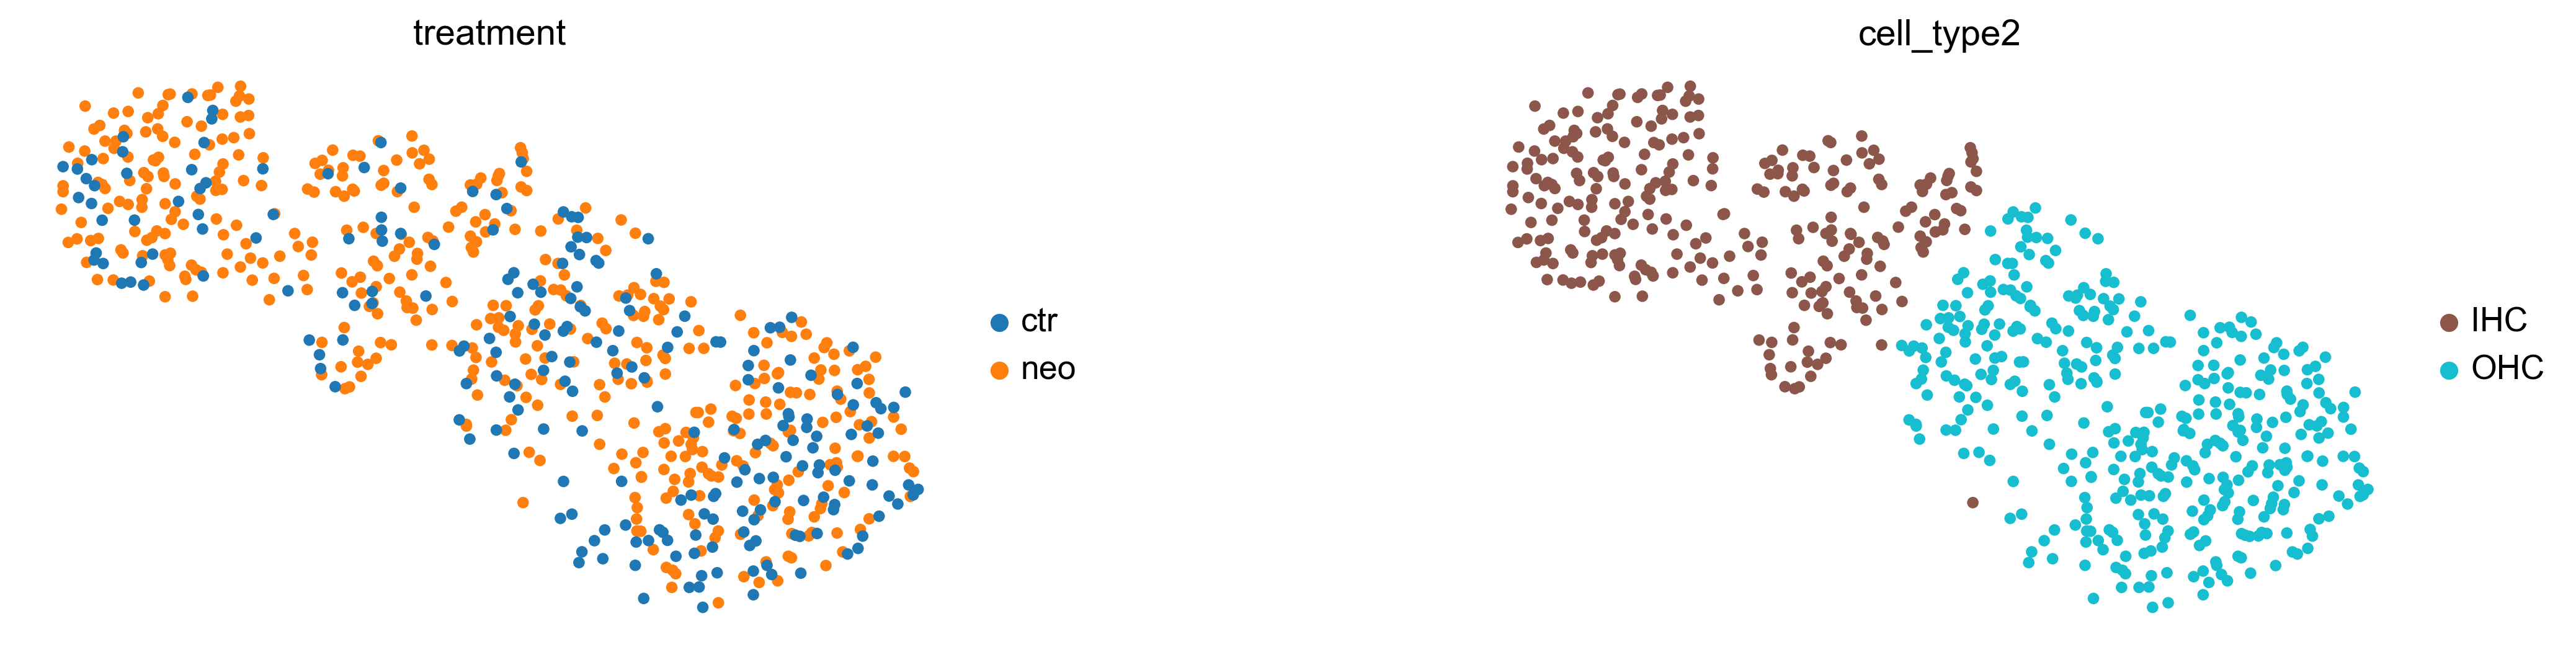

In [58]:
adata_scanvi = adata_scvi.copy()
adata_scanvi.obsm["X_scANVI"] = model_scanvi.get_latent_representation()
sc.pp.neighbors(adata_scanvi, use_rep="X_scANVI",n_neighbors=50)#n_neighbors=50
sc.tl.umap(adata_scanvi,min_dist=0.6)
sc.pl.umap(adata_scanvi, color=['treatment','cell_type2'], wspace=0.4,size=80)

In [59]:
pd.DataFrame(adata_scanvi.obsm["X_scANVI"]).to_csv('P21_hc_itg_scANVI.csv')

In [60]:
X_scANVI = pd.read_csv('P21_hc_itg_scANVI.csv', index_col=0)
X_scANVI

0         1         2         3         4         5         6  \
0    1.959658 -3.158056  1.815301 -1.819611  1.008489 -0.147926  0.371800   
1   -0.567348  0.110296 -0.299774  0.144837  0.426648  0.187511 -1.265118   
2   -0.261914  1.505077 -0.471771 -0.922827 -0.095963  0.229180  0.616370   
3   -0.802250  1.288974 -0.877644 -0.541273  0.900625  0.213341 -0.189574   
4   -0.800628 -0.897732  0.523199  0.228512  0.591226 -0.106275  1.068459   
..        ...       ...       ...       ...       ...       ...       ...   
688 -0.032482  0.544080  1.031271 -0.244926 -0.196193 -0.050389  0.370027   
689 -1.512143 -3.165348  0.047721  3.323365  0.685228  0.115949 -1.529346   
690  0.829907 -0.453485  1.167601  0.031978 -0.521727  0.000908 -0.111219   
691 -1.338429  0.240234 -0.156557  0.843183  0.202594 -0.077953 -0.095115   
692 -0.460873  0.515661 -1.705301 -0.752226  1.862246  0.321034  0.253534   

            7         8         9  ...        20        21        22  \
0   -2.410572 -2.067432  1.415816  ...  1.268093  0.311053 -0.945663   
1    0.607086  0.305138 -0.715538  ...  0.513353 -0.108919  0.389569   
2   -0.359041  0.176544  0.304530  ... -0.340982  0.063466 -0.034697   
3   -1.089096  0.398885 -0.245803  ...  0.003103 -0.118195  0.195073   
4   -1.175070 -0.004107 -1.379761  ...  0.003263 -0.027056 -0.834145   
..        ...       ...       ...  ...       ...       ...       ...   
688  0.257695 -0.142418  0.197357  ... -0.348699 -0.017850 -0.634703   
689 -3.654231 -0.842577 -1.015130  ... -0.714397  0.132366 -1.048067   
690 -3.567519 -0.224150  0.997735  ...  1.670625  0.069284 -0.807800   
691 -0.147761  0.019228  0.181502  ... -0.737480 -0.042454  0.545399   
692  0.353732  0.621359 -0.982089  ... -0.010353 -0.079061 -0.563066   

           23        24        25        26        27        28        29  
0    0.555651  0.202619 -0.269544  0.097268  2.587696 -0.663603 -1.862699  
1   -0.139555 -0.468273  0.032782 -0.004384  0.903324  0.110745  0.227559  
2    0.059729 -0.168391  0.013178 -0.223451 -2.477318  0.207908 -0.389984  
3    0.065376 -0.711630  0.056335 -0.099612 -0.081059 -0.004072  0.042759  
4   -0.006835  1.080647  0.007287  0.255635 -0.751250  0.011037 -0.090369  
..        ...       ...       ...       ...       ...       ...       ...  
688  0.125548  0.349768  0.013100  0.225175 -0.567356 -0.145319 -0.894038  
689  0.079757  0.604371 -0.423188  0.281741 -1.409918  0.719236  0.802762  
690  0.102273 -1.126481 -0.162596  0.218119  1.132482 -0.179478  1.589606  
691  0.083148  0.026959  0.050176  0.221393  0.578359 -0.027108 -0.524932  
692 -0.041689  0.007130  0.089951 -0.168185  0.742385 -0.160205  0.595411  

[693 rows x 30 columns]

In [61]:
adata_HC.obsm["X_scANVI"] = X_scANVI.to_numpy()

In [62]:
sc.pp.neighbors(adata_HC,use_rep="X_scANVI",n_neighbors=50)
sc.tl.umap(adata_HC,min_dist=0.6)

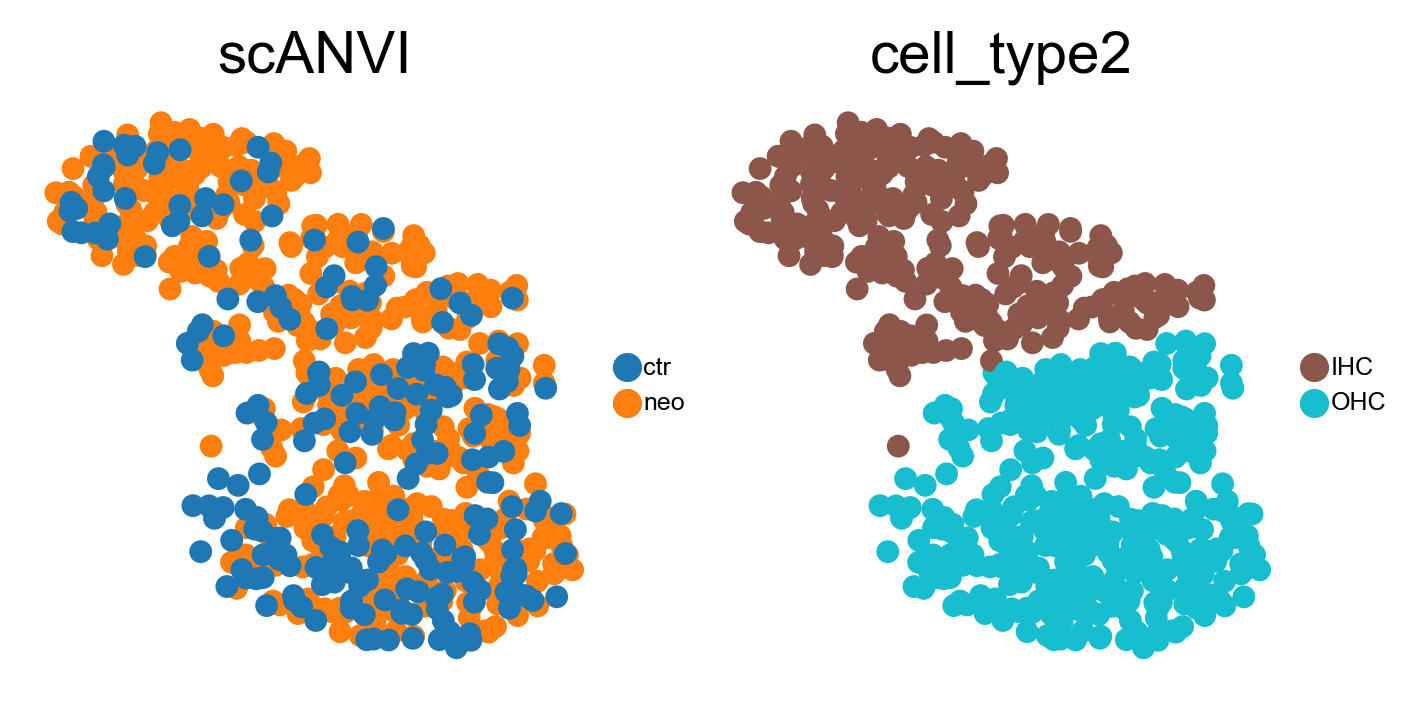

In [63]:
sc.set_figure_params(figsize=(2.5,2.5),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata_HC, color=['treatment','cell_type2'], wspace=0.1,
           size=120,
           legend_fontsize=6,ncols = 3,title='scANVI')

In [64]:
sc.tl.score_genes(adata_HC,neo_Pyroptosis,score_name = "neo_Pyroptosis")

In [65]:
sc.tl.score_genes(adata_HC,neo_Apoptosis,score_name = "neo_Apoptosis")

In [66]:
sc.tl.score_genes(adata_HC,neo_Necroptosis,score_name = "neo_Necroptosis")

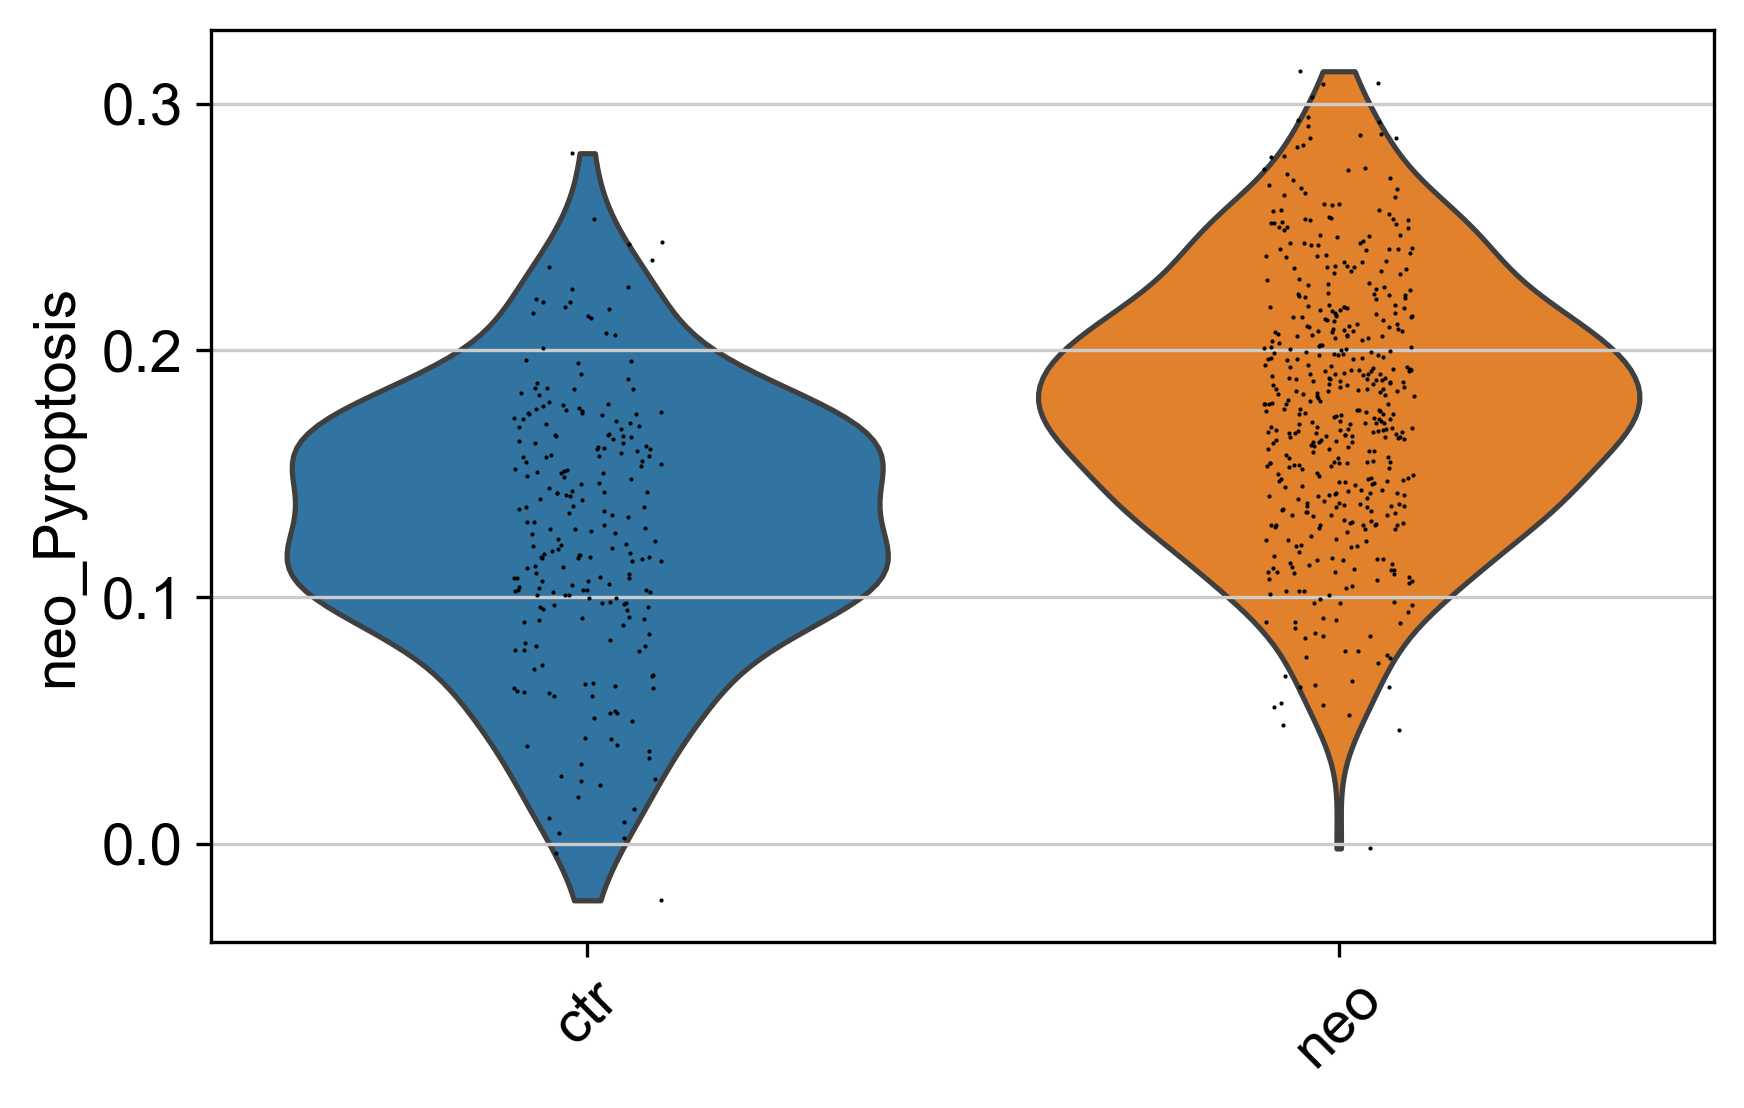

In [67]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_HC,['neo_Pyroptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_neo_HC_Pyroptosis.pdf'
           )# 

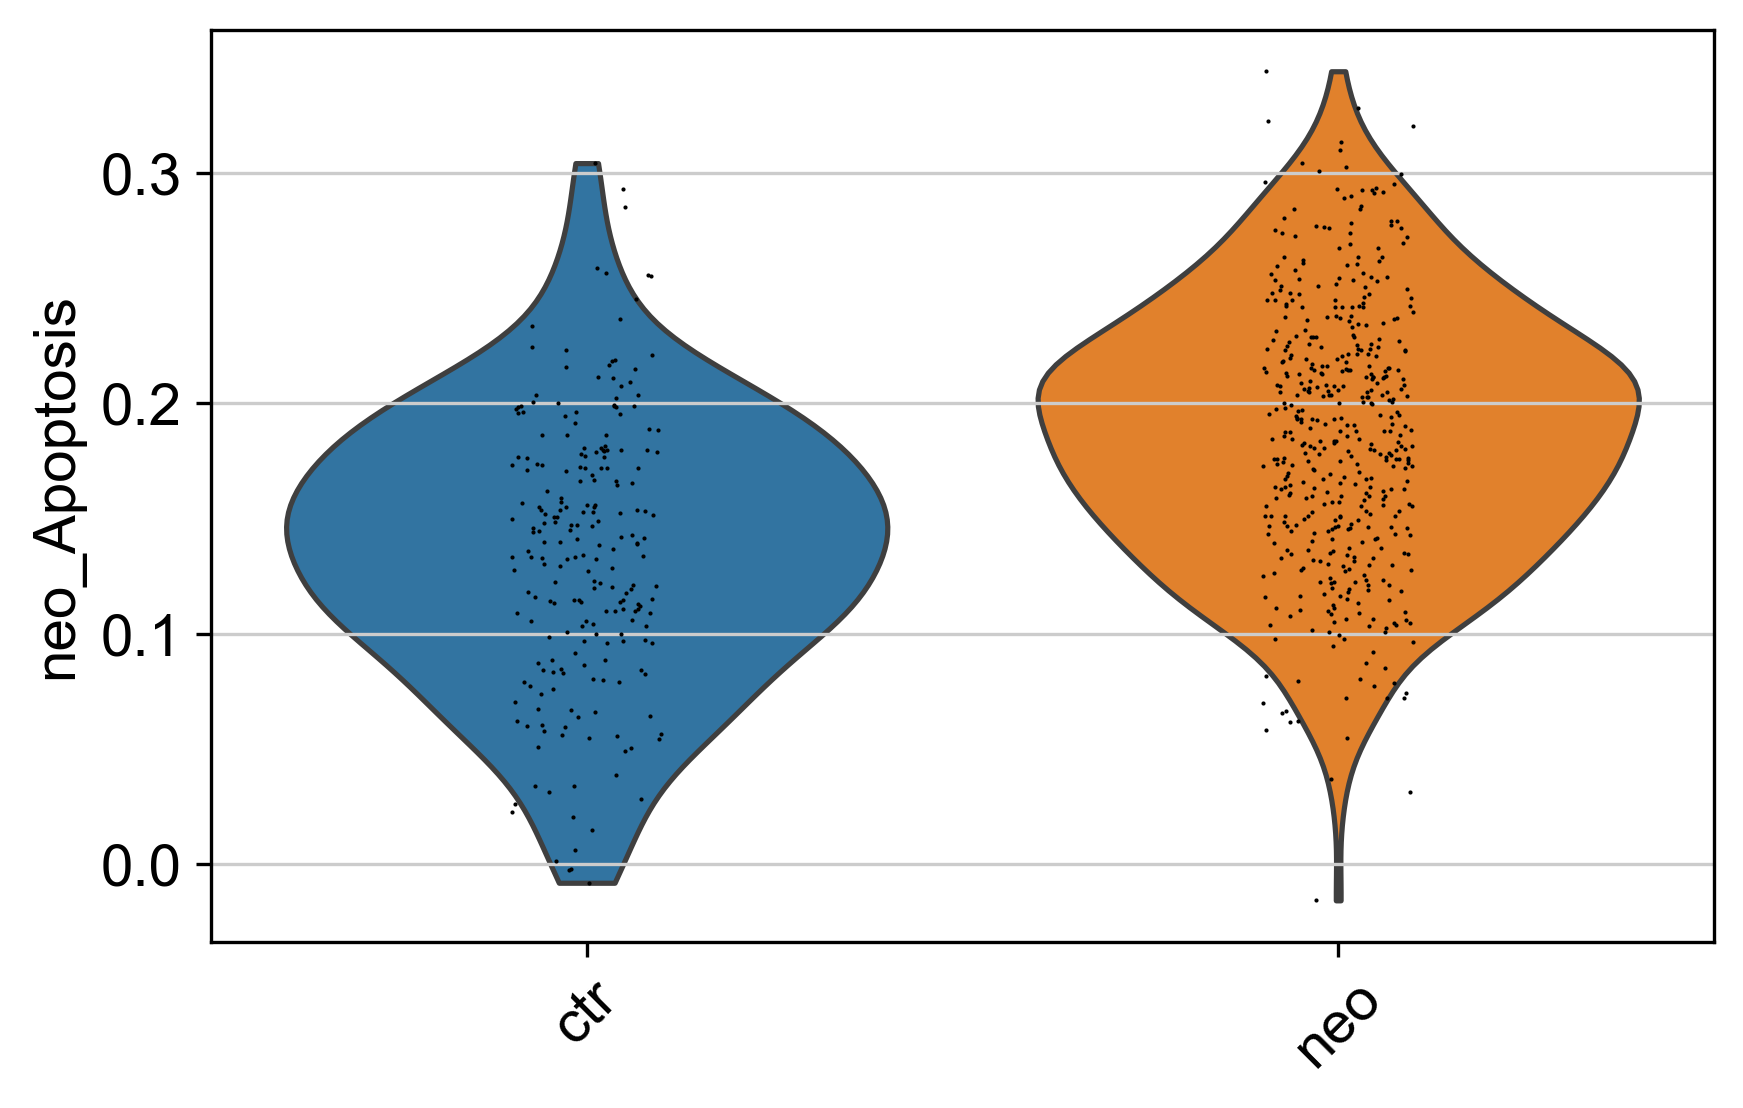

In [68]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_HC,['neo_Apoptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_neo_HC_Apoptosis.pdf'
           )# 

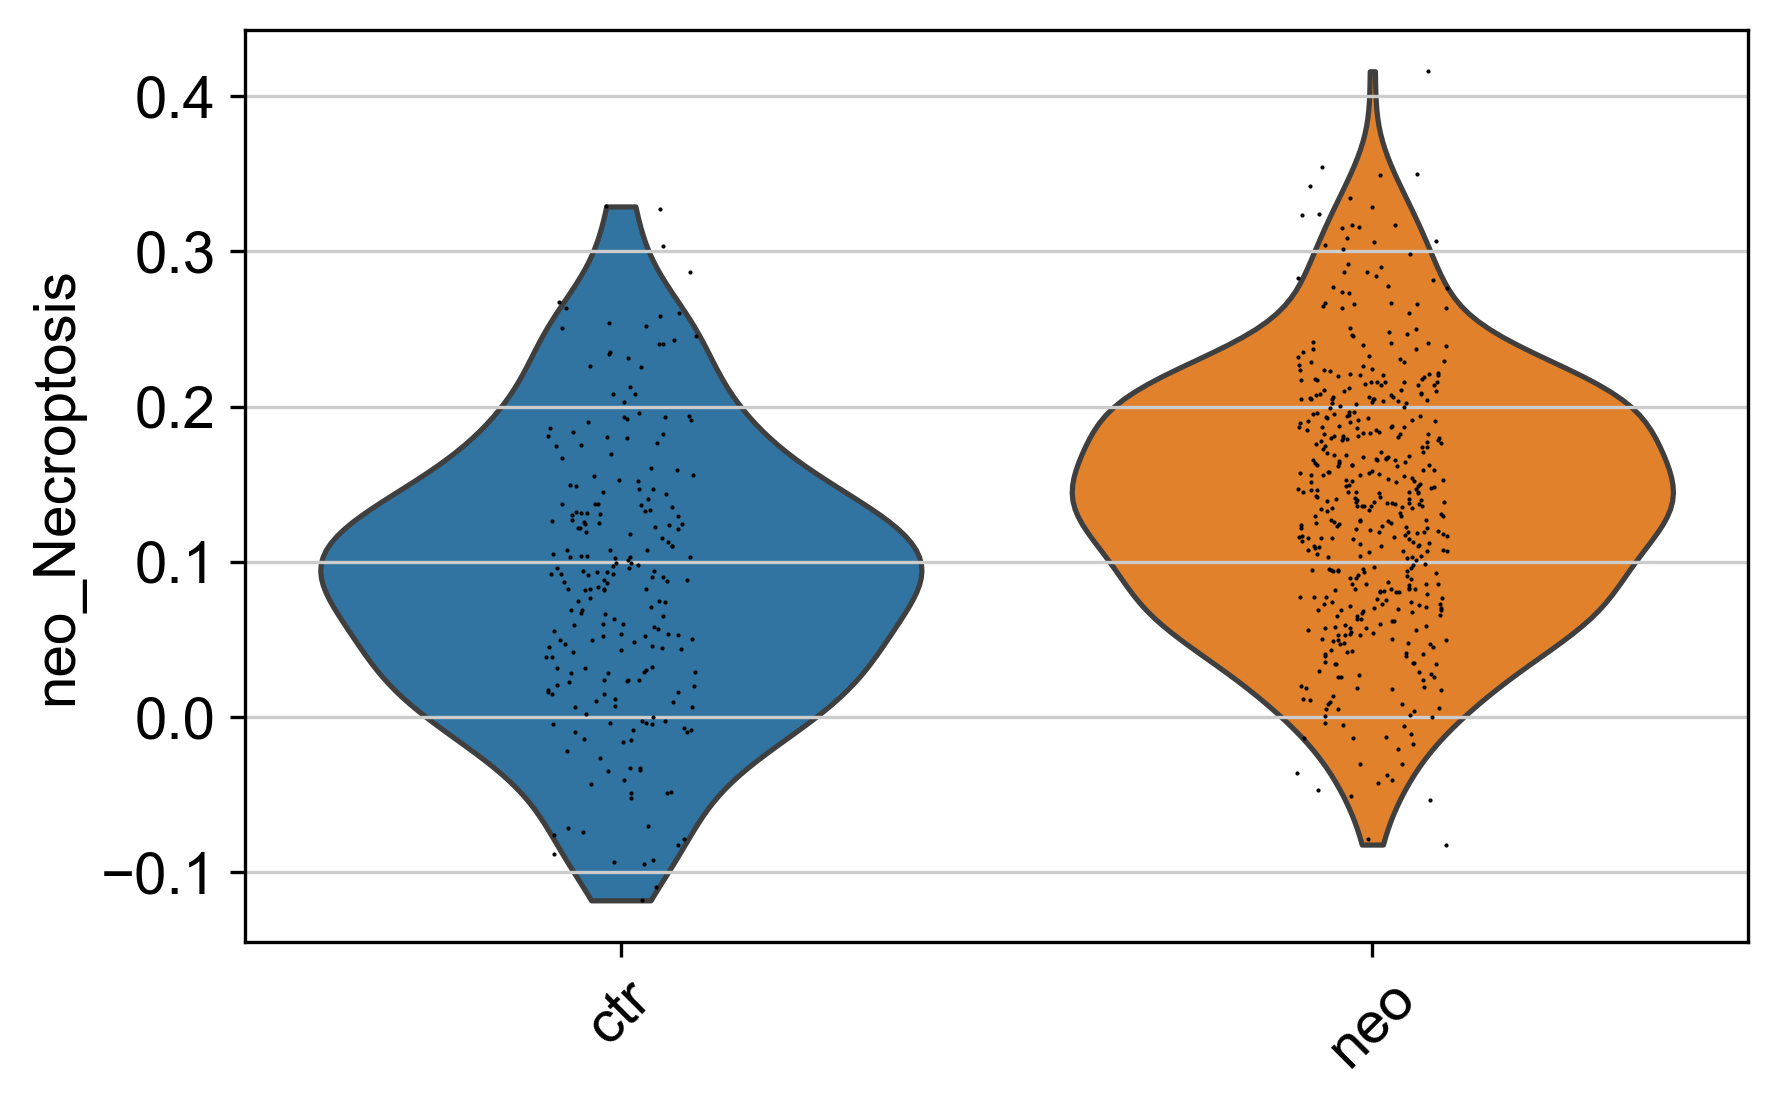

In [69]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_HC,['neo_Necroptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_neo_HC_Necroptosis.pdf'
           )# 

In [70]:
adata_HC_neo = adata_HC[adata_HC.obs['treatment']=='neo']
adata_HC_ctr = adata_HC[adata_HC.obs['treatment']=='ctr']

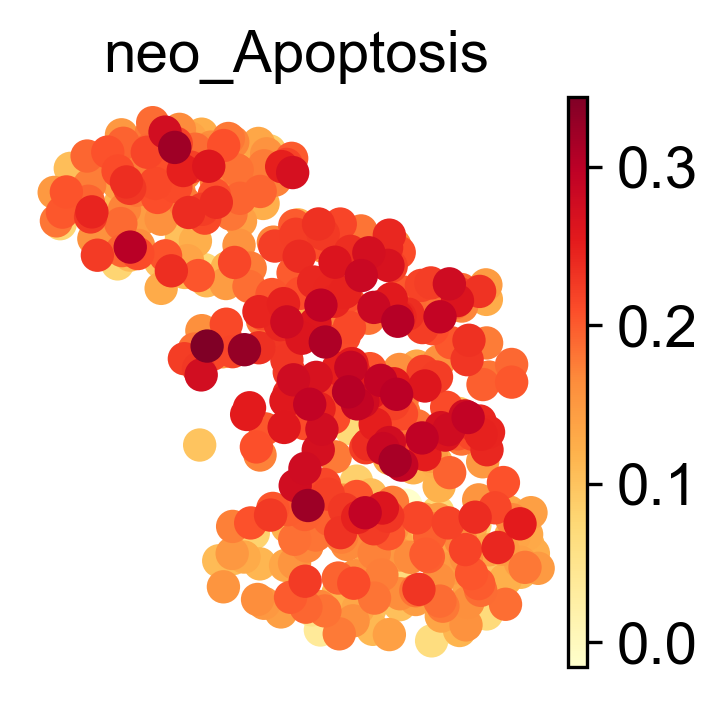

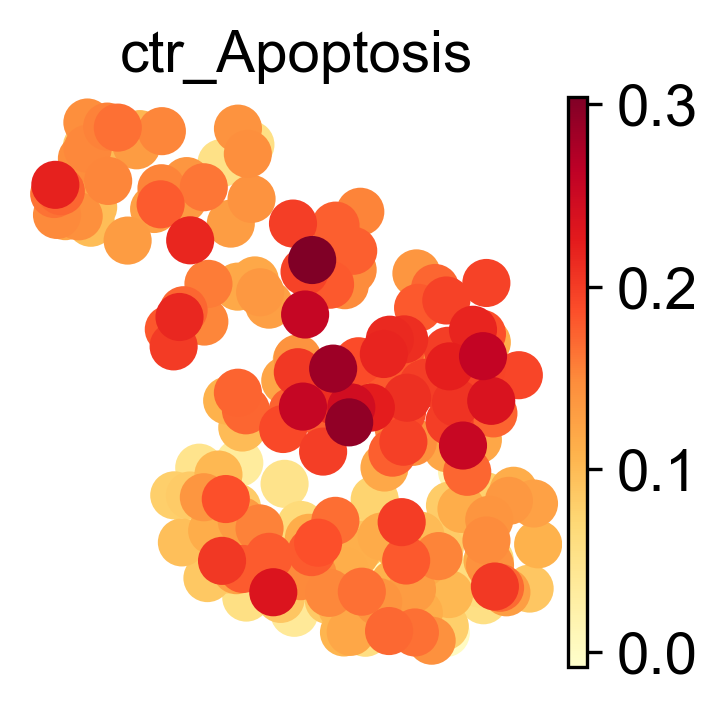

In [71]:
sc.set_figure_params(figsize=(2.5,2.5),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata_HC_neo,color=['neo_Apoptosis'],color_map='YlOrRd',title= 'neo_Apoptosis')
sc.pl.umap(adata_HC_ctr,color=['neo_Apoptosis'],color_map='YlOrRd',title= 'ctr_Apoptosis')

In [73]:
stats.ttest_ind(list(np.array(adata_HC_neo.obs['neo_Pyroptosis'])),list(np.array(adata_HC_ctr.obs['neo_Pyroptosis'])))

TtestResult(statistic=11.530942791252519, pvalue=2.9413823100455257e-28, df=691.0)

In [74]:
stats.ttest_ind(list(np.array(adata_HC_neo.obs['neo_Apoptosis'])),list(np.array(adata_HC_ctr.obs['neo_Apoptosis'])))

TtestResult(statistic=10.71635329322855, pvalue=6.7933523183917415e-25, df=691.0)

In [75]:
stats.ttest_ind(list(np.array(adata_HC_neo.obs['neo_Necroptosis'])),list(np.array(adata_HC_ctr.obs['neo_Necroptosis'])))

TtestResult(statistic=7.487668227415675, pvalue=2.1442461473673542e-13, df=691.0)

In [76]:
  adata_HC.write('P21_HC_ITG_raw_scanvi.h5ad')

In [77]:
adata_HC.obs['cell_type2'].astype(str) + "_" + adata_HC.obs['treatment'].astype(str)

neo1-AAACCCATCCCGTTGT-1-0    OHC_neo
neo1-AAACGAAAGCGGGTTA-1-0    IHC_neo
neo1-AAACGAAGTCCTGGTG-1-0    IHC_neo
neo1-AAACGCTAGCAGGTCA-1-0    IHC_neo
neo1-AAACGCTTCGTTACCC-1-0    OHC_neo
                              ...   
ctr2-TTGCATTGTAGACACG-1-1    OHC_ctr
ctr2-TTGCTGCCAGATACCT-1-1    OHC_ctr
ctr2-TTGGGCGCAAGGGCAT-1-1    OHC_ctr
ctr2-TTGGTTTAGCTGAAGC-1-1    OHC_ctr
ctr2-TTTCACATCGAAGAAT-1-1    IHC_ctr
Length: 693, dtype: object

In [78]:
import pandas as pd
adata_HC.obs['celltype_condition'] = adata_HC.obs['cell_type2'].astype(str) + "_" + adata_HC.obs['treatment'].astype(str)

In [79]:
import pandas as pd
adata_HC.obs['celltype_condition'] = pd.Categorical(adata_HC.obs['celltype_condition'])

In [80]:
adata_IHC = adata_HC[adata_HC.obs['cell_type2']=='IHC']

In [81]:
adata_OHC = adata_HC[adata_HC.obs['cell_type2']=='OHC']

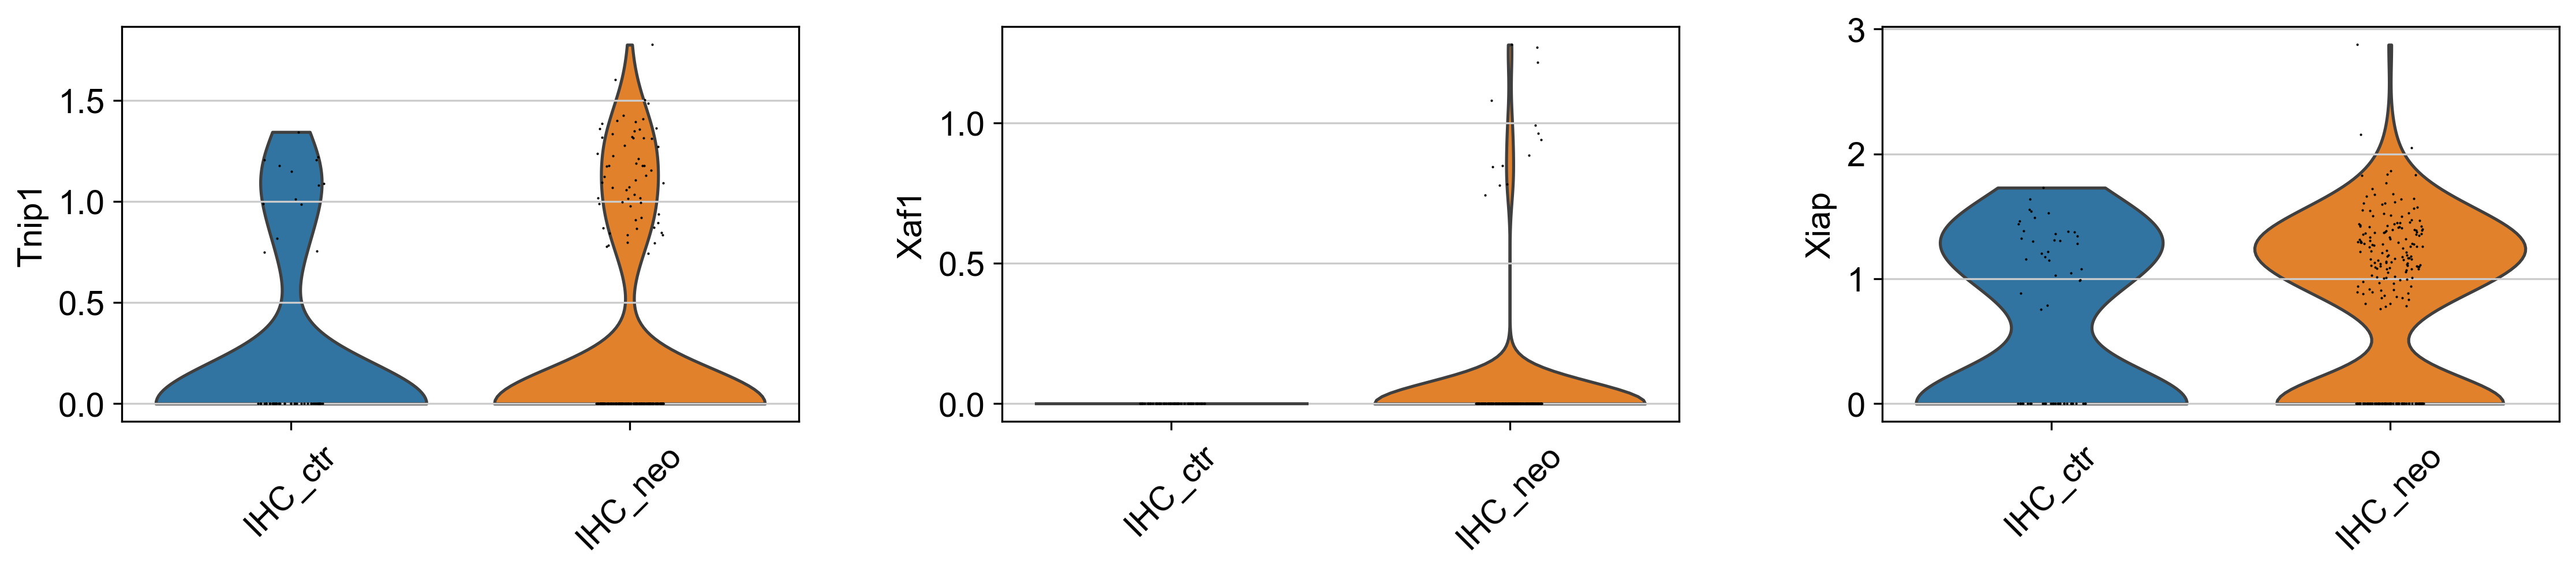

In [88]:
sc.set_figure_params(figsize=(5,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_IHC,['Tnip1','Xaf1','Xiap'],groupby='celltype_condition',
             jitter=True,rotation=45,save='P21_IHC_TXX.pdf'
           )# 

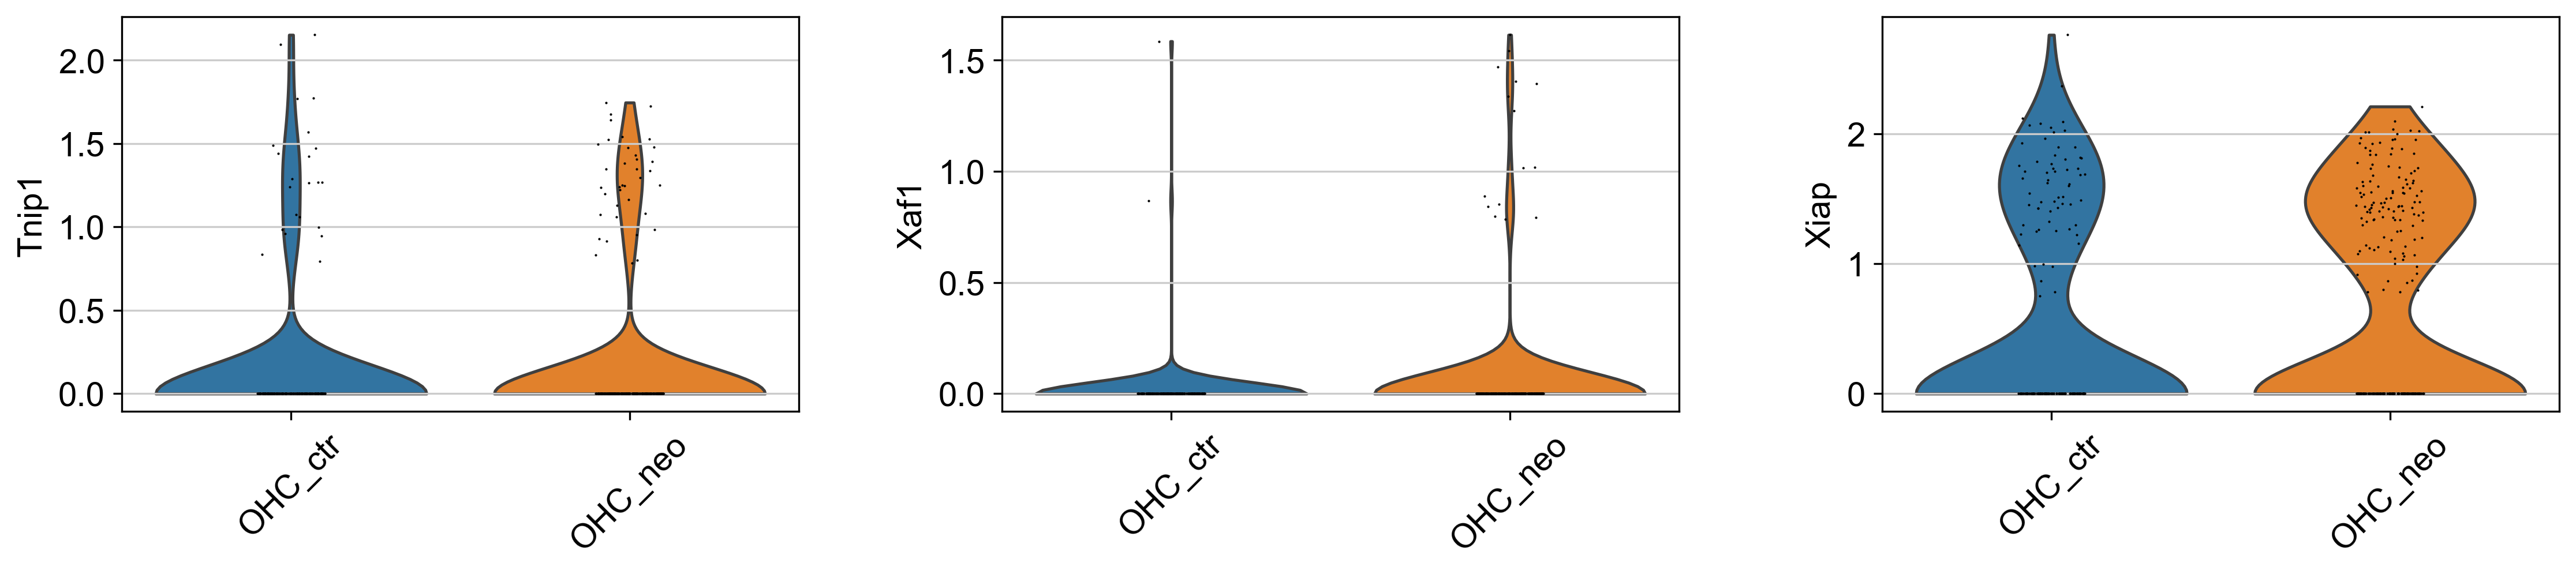

In [89]:
sc.set_figure_params(figsize=(5,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_OHC,['Tnip1','Xaf1','Xiap'],groupby='celltype_condition',
             jitter=True,rotation=45,save='P21_OHC_TXX.pdf'
           )# 

In [91]:
adata_SGNI = adata[adata.obs['cell_type2']=='TypeI_SGN']

In [92]:
adata_SGNII = adata[adata.obs['cell_type2']=='TypeII_SGN']

In [94]:
import pandas as pd
adata_SGNI.obs['celltype_condition'] = adata_SGNI.obs['cell_type2'].astype(str) + "_" + adata_SGNI.obs['treatment'].astype(str)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12272\2811461022.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_SGNI.obs['celltype_condition'] = adata_SGNI.obs['cell_type2'].astype(str) + "_" + adata_SGNI.obs['treatment'].astype(str)


In [95]:
import pandas as pd
adata_SGNI.obs['celltype_condition'] = pd.Categorical(adata_SGNI.obs['celltype_condition'])

In [96]:
import pandas as pd
adata_SGNII.obs['celltype_condition'] = adata_SGNII.obs['cell_type2'].astype(str) + "_" + adata_SGNII.obs['treatment'].astype(str)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12272\1259613156.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_SGNII.obs['celltype_condition'] = adata_SGNII.obs['cell_type2'].astype(str) + "_" + adata_SGNII.obs['treatment'].astype(str)


In [97]:
import pandas as pd
adata_SGNII.obs['celltype_condition'] = pd.Categorical(adata_SGNII.obs['celltype_condition'])

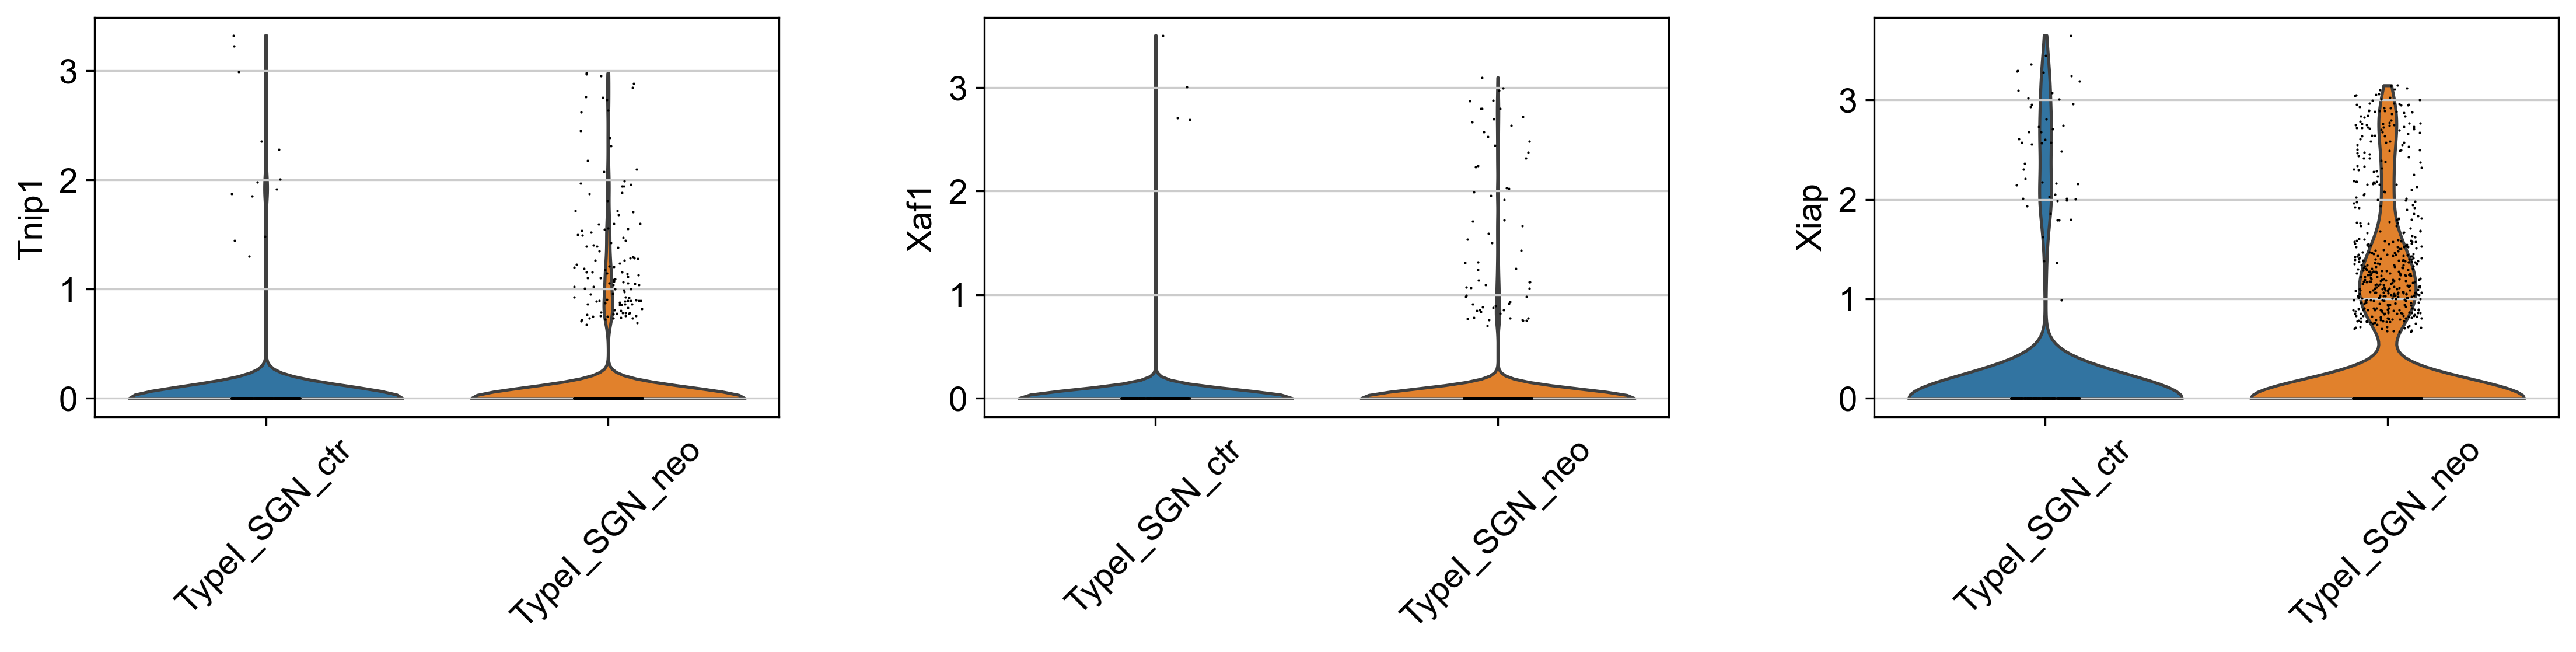

In [98]:
sc.set_figure_params(figsize=(5,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_SGNI,['Tnip1','Xaf1','Xiap'],groupby='celltype_condition',
             jitter=True,rotation=45,save='P21_SGNI_TXX.pdf'
           )# 

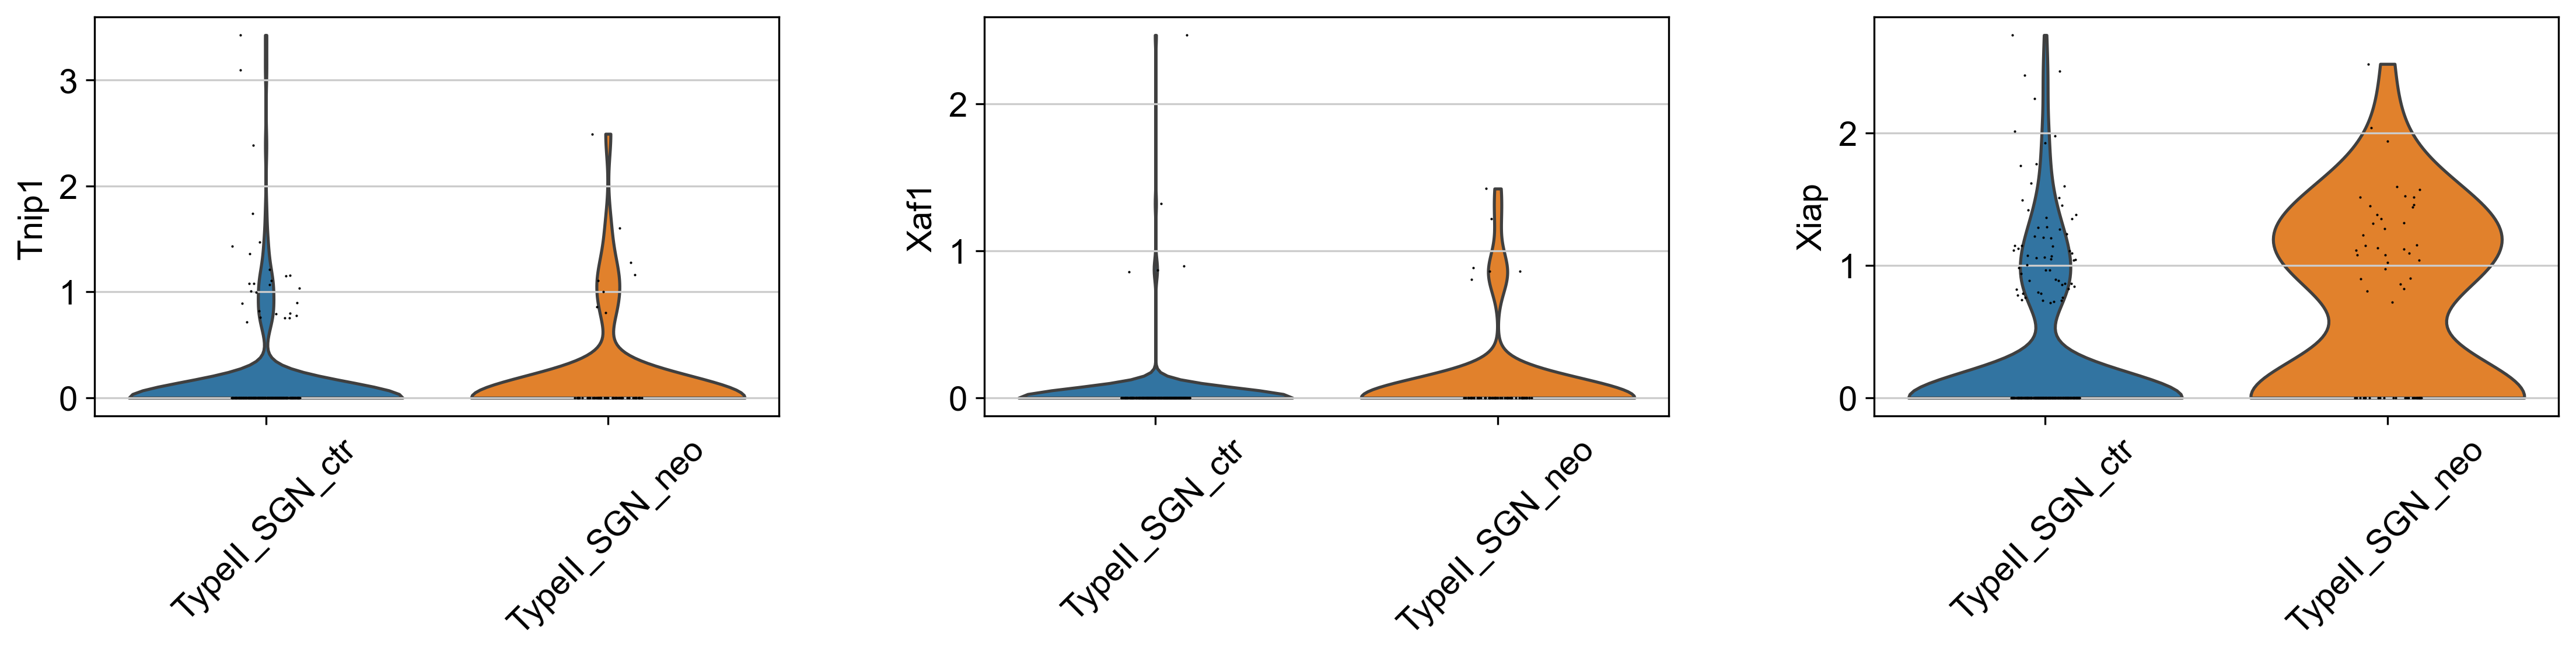

In [99]:
sc.set_figure_params(figsize=(5,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_SGNII,['Tnip1','Xaf1','Xiap'],groupby='celltype_condition',
             jitter=True,rotation=45,save='P21_SGNII_TXX.pdf'
           )# 

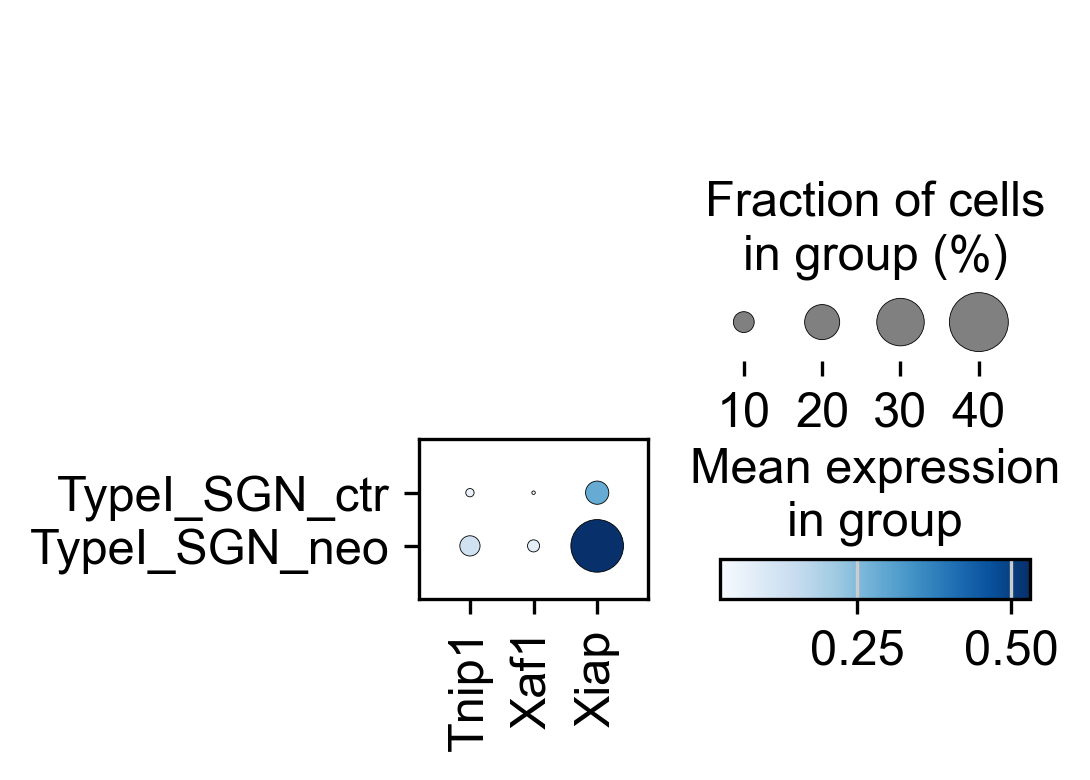

In [102]:
sc.pl.dotplot(adata_SGNI,['Tnip1','Xaf1','Xiap'],
              groupby='celltype_condition',
          #   standard_scale = 'var',
          #   save='aav_hc_neo_ihc_pluripotency.pdf',
             save='P21_SGNI_TXX_DP.pdf',
              cmap='Blues')

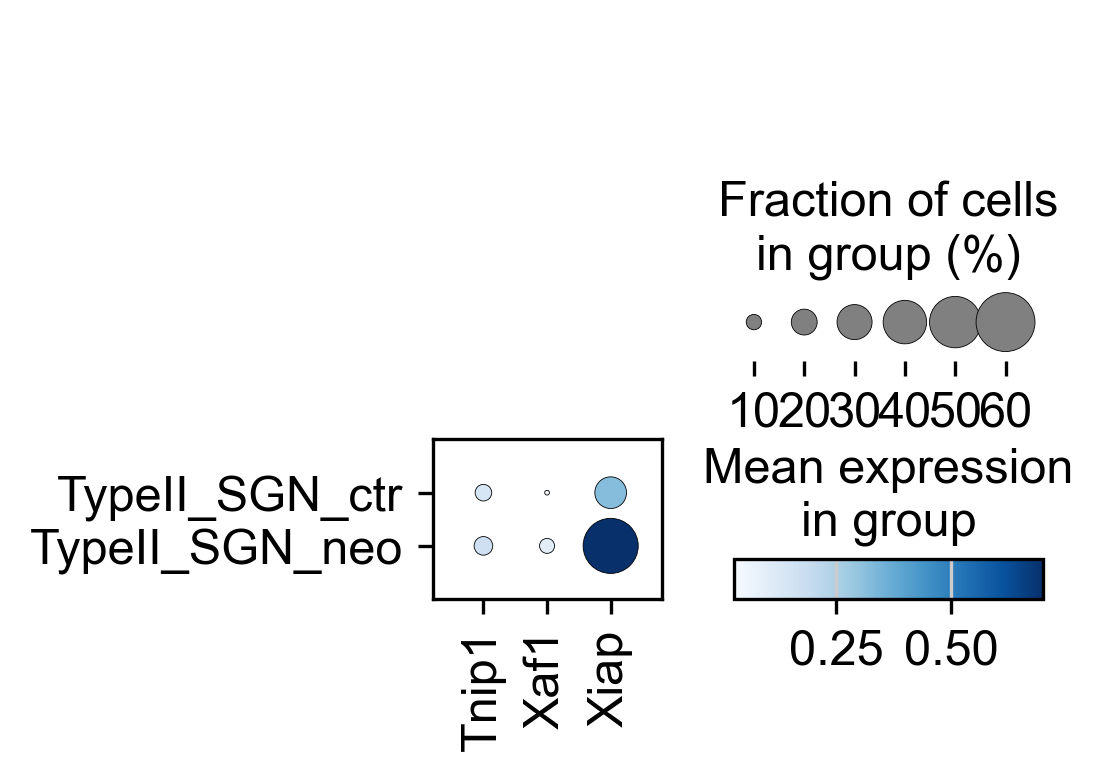

In [103]:
sc.pl.dotplot(adata_SGNII,['Tnip1','Xaf1','Xiap'],
              groupby='celltype_condition',
          #   standard_scale = 'var',
          #   save='aav_hc_neo_ihc_pluripotency.pdf',
             save='P21_SGNII_TXX_DP.pdf',
              cmap='Blues')

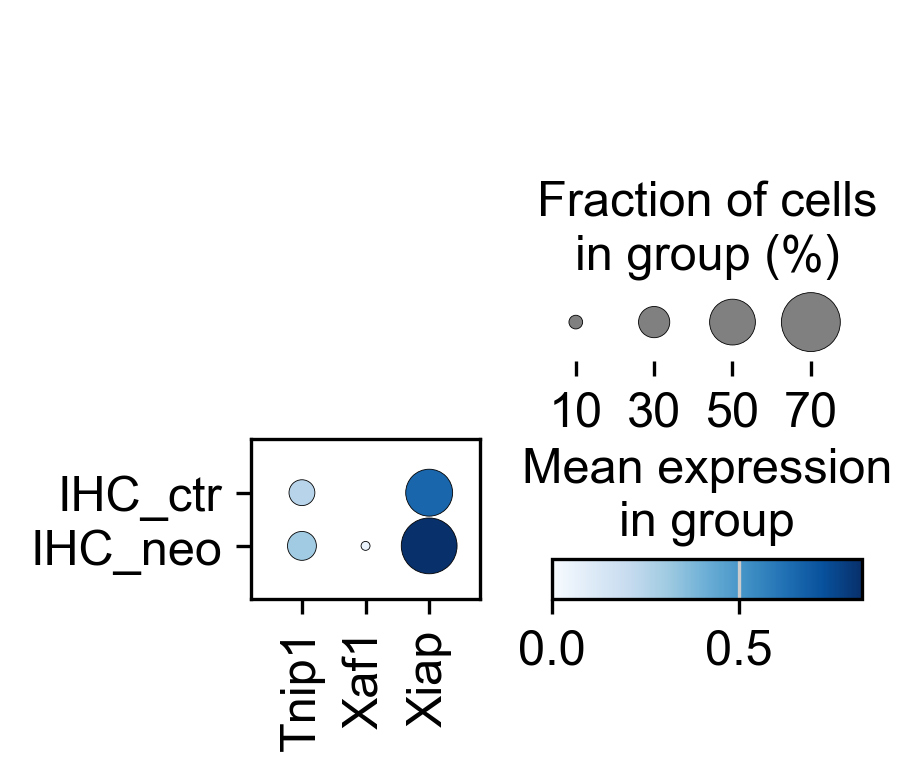

In [104]:
sc.pl.dotplot(adata_IHC,['Tnip1','Xaf1','Xiap'],
              groupby='celltype_condition',
          #   standard_scale = 'var',
          #   save='aav_hc_neo_ihc_pluripotency.pdf',
             save='P21_IHC_TXX_DP.pdf',
              cmap='Blues')

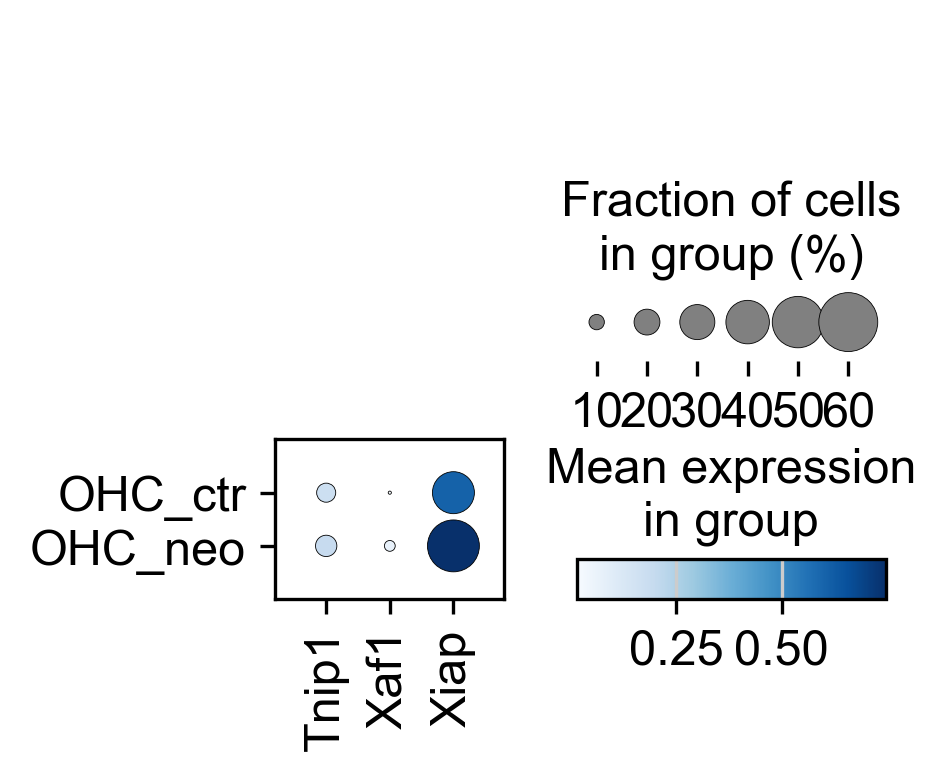

In [105]:
sc.pl.dotplot(adata_OHC,['Tnip1','Xaf1','Xiap'],
              groupby='celltype_condition',
          #   standard_scale = 'var',
          #   save='aav_hc_neo_ihc_pluripotency.pdf',
             save='P21_OHC_TXX_DP.pdf',
              cmap='Blues')

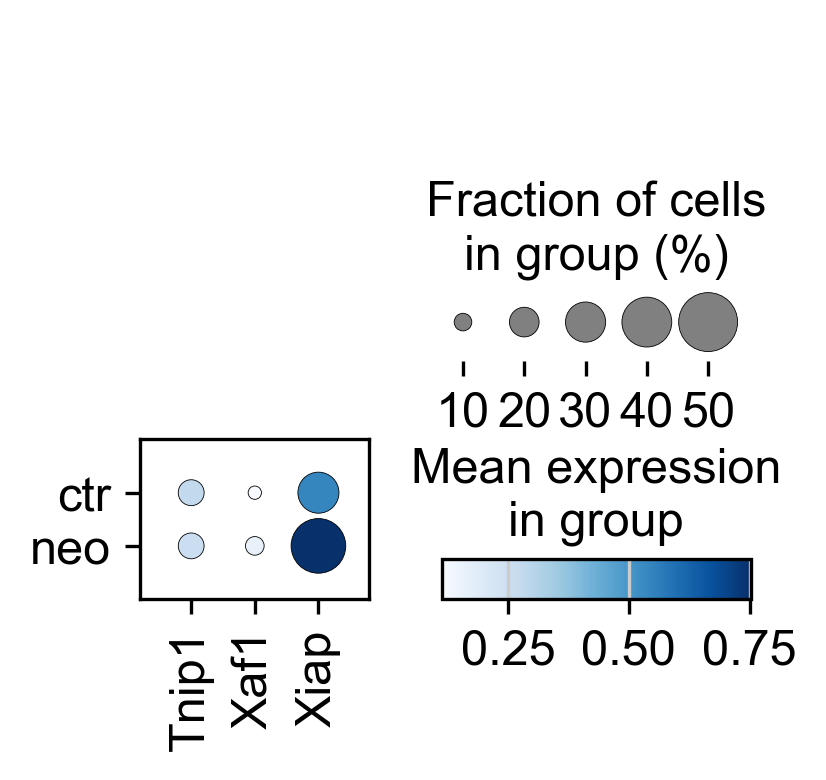

In [106]:
sc.pl.dotplot(adata,['Tnip1','Xaf1','Xiap'],
              groupby='treatment',
          #   standard_scale = 'var',
          #   save='aav_hc_neo_ihc_pluripotency.pdf',
             save='P21_TXX_DP.pdf',
              cmap='Blues')

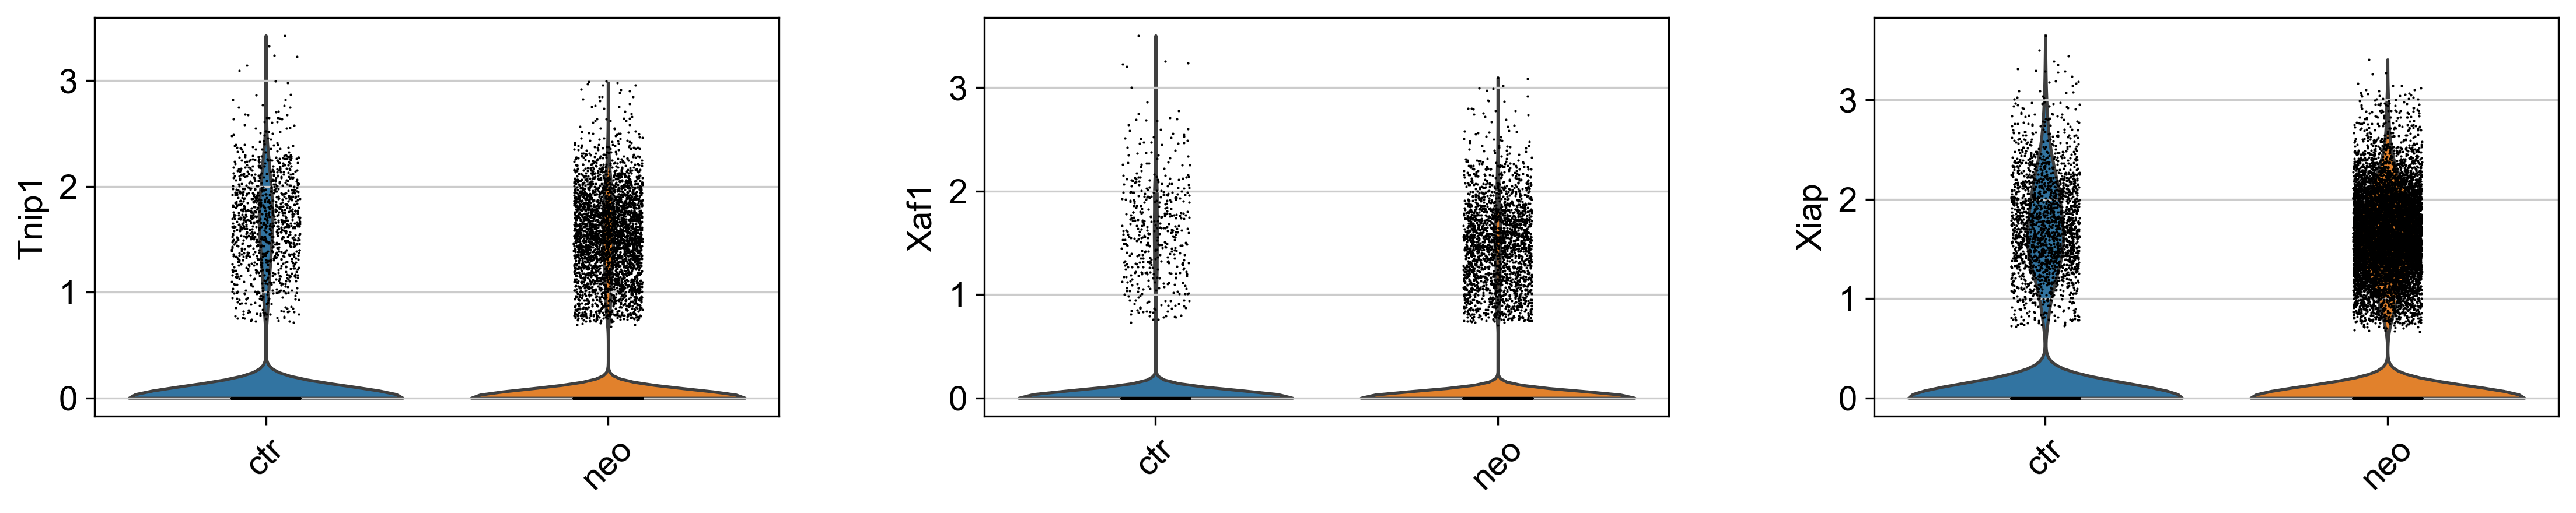

In [107]:
sc.set_figure_params(figsize=(5,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata,['Tnip1','Xaf1','Xiap'],groupby='treatment',
             jitter=True,rotation=45,save='P21_TXX.pdf'
           )# 

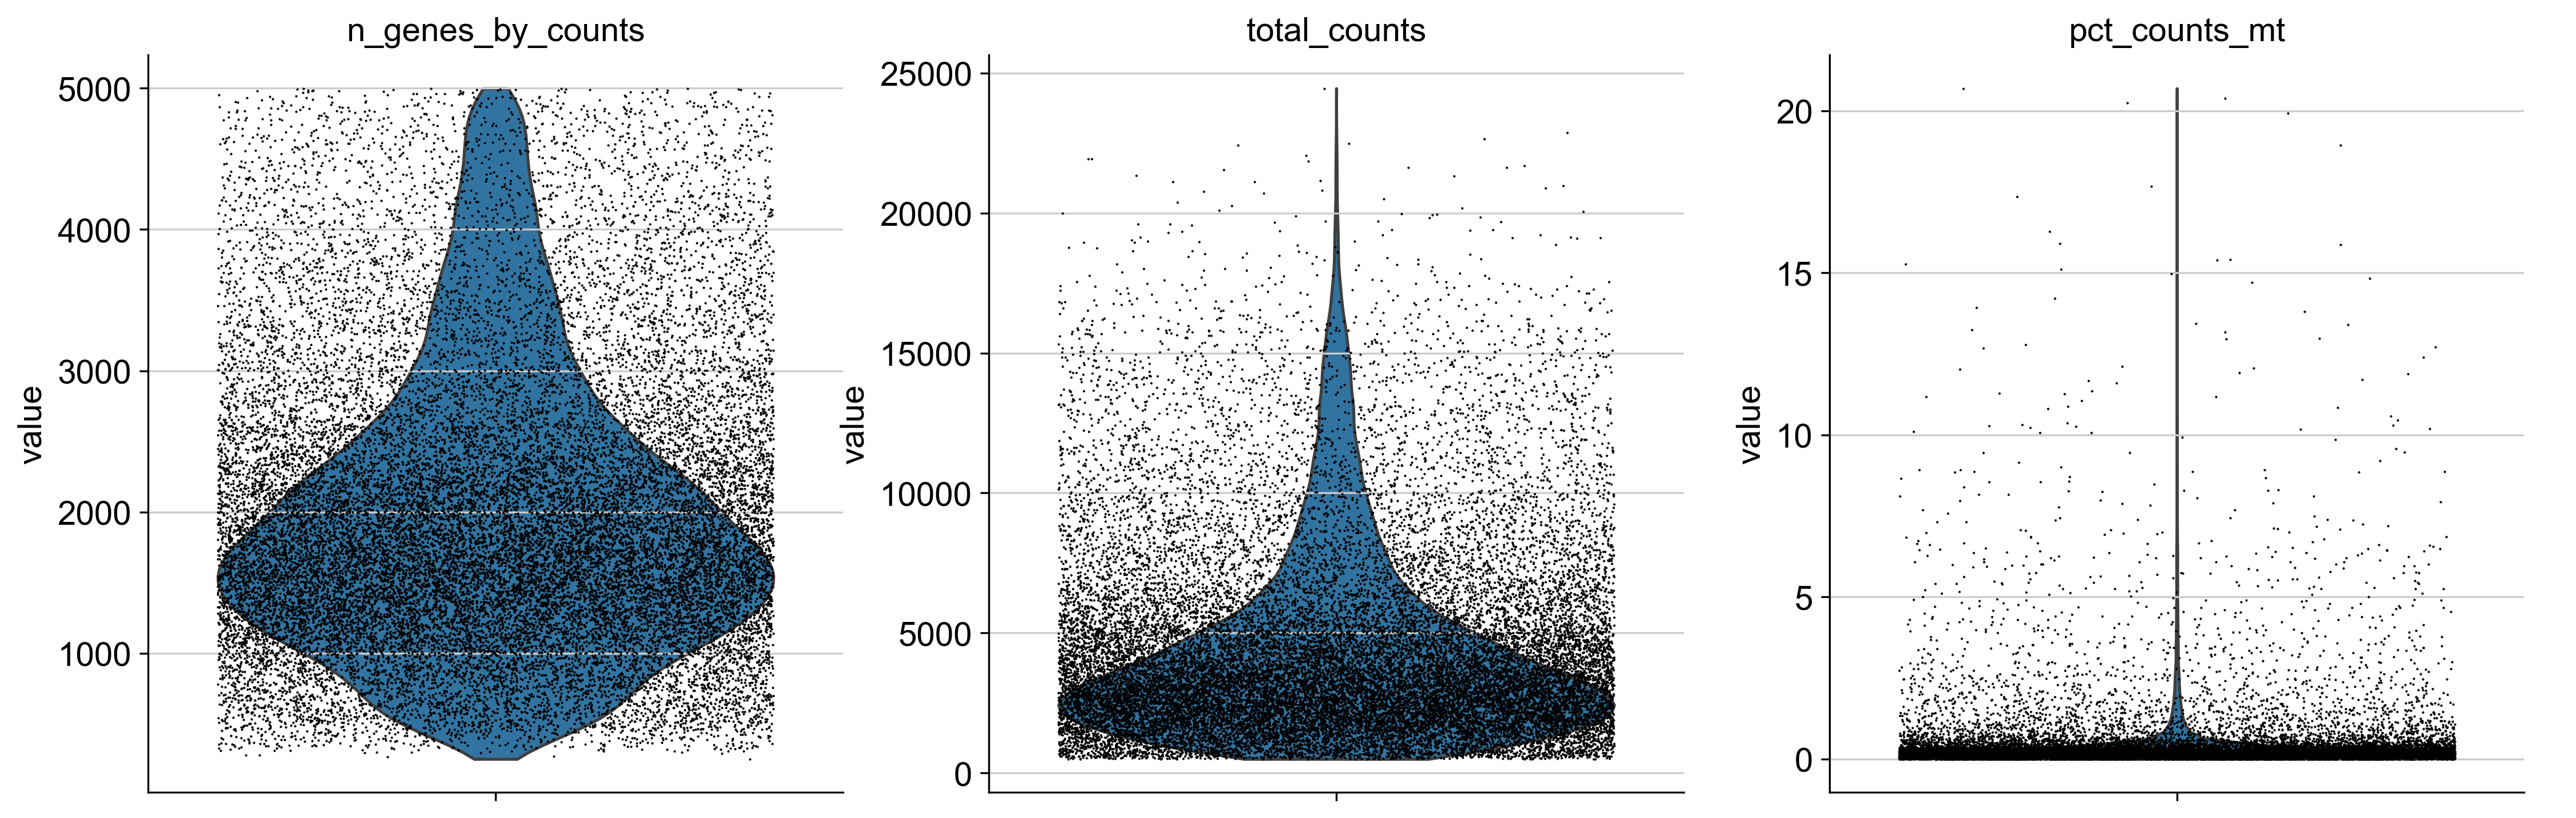